<h1><font color="red" style="sans-serif"> Aerofit </font></h1>

Aerofit is a leading brand in the field of fitness equipment. Aerofit provides a product range including machines such as treadmills, exercise bikes, gym equipment, and fitness accessories to cater to the needs of all categories of people.

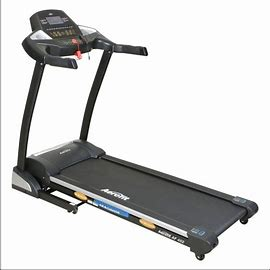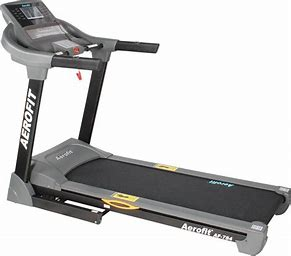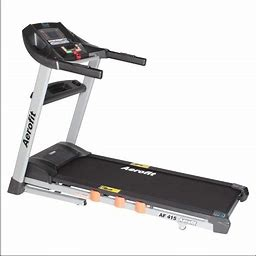

<h1><font color="red" style="sans-serif"> Business Problem </font></h1>

The market research team at AeroFit wants to **identify the characteristics of the target audience** for each type of treadmill offered by the company, to provide a better recommendation of the treadmills to the new customers. The team decides to investigate whether there are differences across the product with respect to customer characteristics.


<h1> <font color="red" style="sans-serif"> High Level Solution </font></h1>

Perform descriptive analytics to **create a customer profile for each AeroFit treadmill product** by developing appropriate tables and charts.
For each AeroFit treadmill product, construct two-way contingency tables and compute all conditional and marginal probabilities along with their insights/impact on the business.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

csv file:-
https://drive.google.com/file/d/1_IWJ87DqVTgATLUUXw9nd8XSloYY7VIn/view?usp=sharing

In [ ]:
# read dataset
!gdown "1_IWJ87DqVTgATLUUXw9nd8XSloYY7VIn" -O "aerofit.csv"
aerofit = pd.read_csv("aerofit.csv")
aerofit.head()

Downloading...
From: https://drive.google.com/uc?id=1_IWJ87DqVTgATLUUXw9nd8XSloYY7VIn
To: /content/aerofit.csv
100% 7.28k/7.28k [00:00<00:00, 23.1MB/s]


,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [ ]:
aerofit.shape

(180, 9)

<h2><font color="cyan" style="sans-serif">Features Description</font></h2>

Dataset contains 180 datapoints with 9 features.

Following are the feature characteristics:


1. Product Purchased:	KP281, KP481, or KP781
2. Age:	In years
3. Gender:	Male/Female
4. Education:	In years
5. MaritalStatus:	Single or partnered
6. Usage:	The average number of times the customer plans to use the treadmill each week.
7. Income:	Annual income (in $)
8. Fitness:	Self-rated fitness on a 1-to-5 scale, where 1 is the poor shape and  5 is the excellent shape.
9. Miles:	The average number of miles the customer expects to walk/run each week




In [ ]:
aerofit.dtypes

Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object

<h4><font color="cyan">Observation (Data Type)</font></h4>

1. Data type of Product is object (string).
2. Data type of Age is int64.
3. Data type of Gender is object (string).
4. Data type of Education is int64.
5. Data type of MaritalStatus is object (string).
6. Data type of Usage is int64.
7. Data type of Fitness is int64.
8. Data type of Income is int64.
9. Data type of Miles is int64.

In [ ]:
# Descriptive Statistics
aerofit.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


<h4><font color="cyan" style="sans-serif">Observations from Descriptive Statistics (Numerical)</font></h4>

1. Age: Median age of the customer(s) is 26 years, having maximum age of 50 years and minimum age of 18 years.
2. Education (Years): Median education years of the customer(s) is 16 years, with maximum education years is 21, and minimum years is 12.
3. Usage (Per week) : Median usage of treadmill is 3 times per week, with maximum 7 times per week and minimum 2 times per week.
4. Fitness (1-5) : Median fitness rating of customer(s) is 3 (moderately fit) and mean fitness roughly lies around the median.
5. Income ($): Median income of customer(s) is 50.5K annually. Maximum income is 104K annually, and minimum income is 29.5K.
6. Miles: Median distance travelled (walk/run) by customer(s) is 94. Maximum distance travelled is 114.75 and minimum is 21.

In [ ]:
aerofit['Age'].unique()

array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 43, 44, 46, 47, 50, 45, 48, 42])

In [ ]:
aerofit['Education'].unique()

array([14, 15, 12, 13, 16, 18, 20, 21])

In [ ]:
aerofit['Income'].unique()

array([ 29562,  31836,  30699,  32973,  35247,  37521,  36384,  38658,
        40932,  34110,  39795,  42069,  44343,  45480,  46617,  48891,
        53439,  43206,  52302,  51165,  50028,  54576,  68220,  55713,
        60261,  67083,  56850,  59124,  61398,  57987,  64809,  47754,
        65220,  62535,  48658,  54781,  48556,  58516,  53536,  61006,
        57271,  52291,  49801,  62251,  64741,  70966,  75946,  74701,
        69721,  83416,  88396,  90886,  92131,  77191,  52290,  85906,
       103336,  99601,  89641,  95866, 104581,  95508])

In [ ]:
aerofit['Miles'].unique()

array([112,  75,  66,  85,  47, 141, 103,  94, 113,  38, 188,  56, 132,
       169,  64,  53, 106,  95, 212,  42, 127,  74, 170,  21, 120, 200,
       140, 100,  80, 160, 180, 240, 150, 300, 280, 260, 360])

In [ ]:
aerofit['Fitness'].value_counts(normalize=True)

3    0.538889
5    0.172222
2    0.144444
4    0.133333
1    0.011111
Name: Fitness, dtype: float64

In [ ]:
aerofit['Usage'].value_counts(normalize=True)

3    0.383333
4    0.288889
2    0.183333
5    0.094444
6    0.038889
7    0.011111
Name: Usage, dtype: float64

In [ ]:
aerofit['Product'].value_counts(normalize=True)

KP281    0.444444
KP481    0.333333
KP781    0.222222
Name: Product, dtype: float64

In [ ]:
aerofit['Gender'].value_counts(normalize=True)

Male      0.577778
Female    0.422222
Name: Gender, dtype: float64

In [ ]:
aerofit['MaritalStatus'].value_counts(normalize=True)

Partnered    0.594444
Single       0.405556
Name: MaritalStatus, dtype: float64

<h4><font color="cyan" style="sans-serif">General Observations </font></h4>

1. Fitness: More than 50% customers have given self-rating of 3, followed by 5 and 2.
2. Usage: Fair amount (38.3%) of people have reported usage of treadmills 3 times per week, followed by 4 times per week, and 2 times per week respectively.
3. Product: Most commonly product purchased is KP281, followed by KP481, and KP781 respectively.
4. Gender: Male is the most common gender who purchased more of the aerofit products.
5. MartialStatus: Couples purchased more products compare to Single people. Maybe Couple Goals!

In [ ]:
# Check for missing values
aerofit.isna().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

No values are missing from the features.

<h5><font color="red" style="sans-serif">PS: Outliers are covered in succeeding cells.</font></h5>

In [ ]:
aerofit.duplicated().sum()

0

There are no duplicated values!

<h2><font color="red" style="sans-serif">Visual Analysis </font></h2>



<h3><font color="cyan" style="sans-serif">Correlation</font></h3>

In [ ]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 20,7

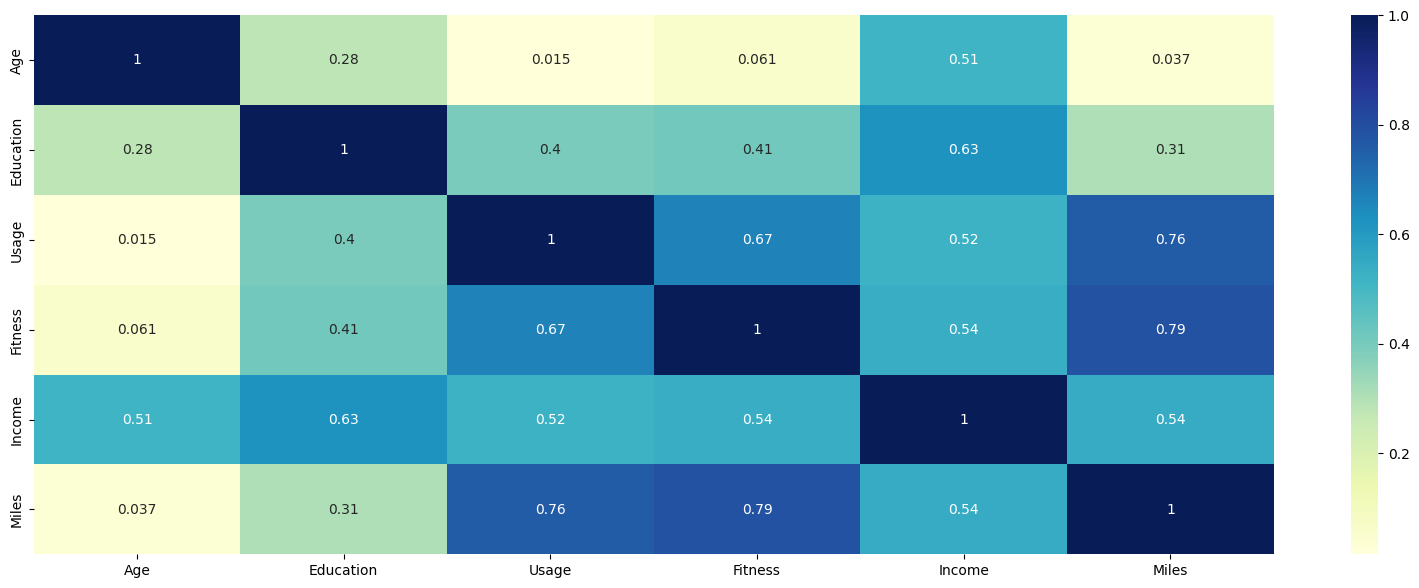

In [ ]:
# heatmap
#sns.heatmap(aerofit.corr(), annot=True, cmap='YlGnBu')
#plt.show()

import warnings

# Filter out the FutureWarning
warnings.filterwarnings("ignore", category=FutureWarning)

sns.heatmap(aerofit.corr(), annot=True, cmap='YlGnBu')
plt.show()

<h4><font color="cyan" style="sans-serif">Observations</font></h4>

Here Pearson co-efficient is used to evalute the correlation between numerical data points. Pearson evalutes the linear relationship between data points.


Noting down the observations which are higher than 0.5.

1. Correlation between Age & Income is 0.51
2. Correlation between Education & Income is 0.63.
3. Correlation between Usage & Fitness is 0.67.
4. Correlation between Usage & Income is 0.52.
5. Correlation between Usage & Miles is 0.76.
6. Correlation between Fitness & Income is 0.54.
7. Correlation between Fitness & Miles is 0.79.
8. Correlation between Income & Miles is 0.54.

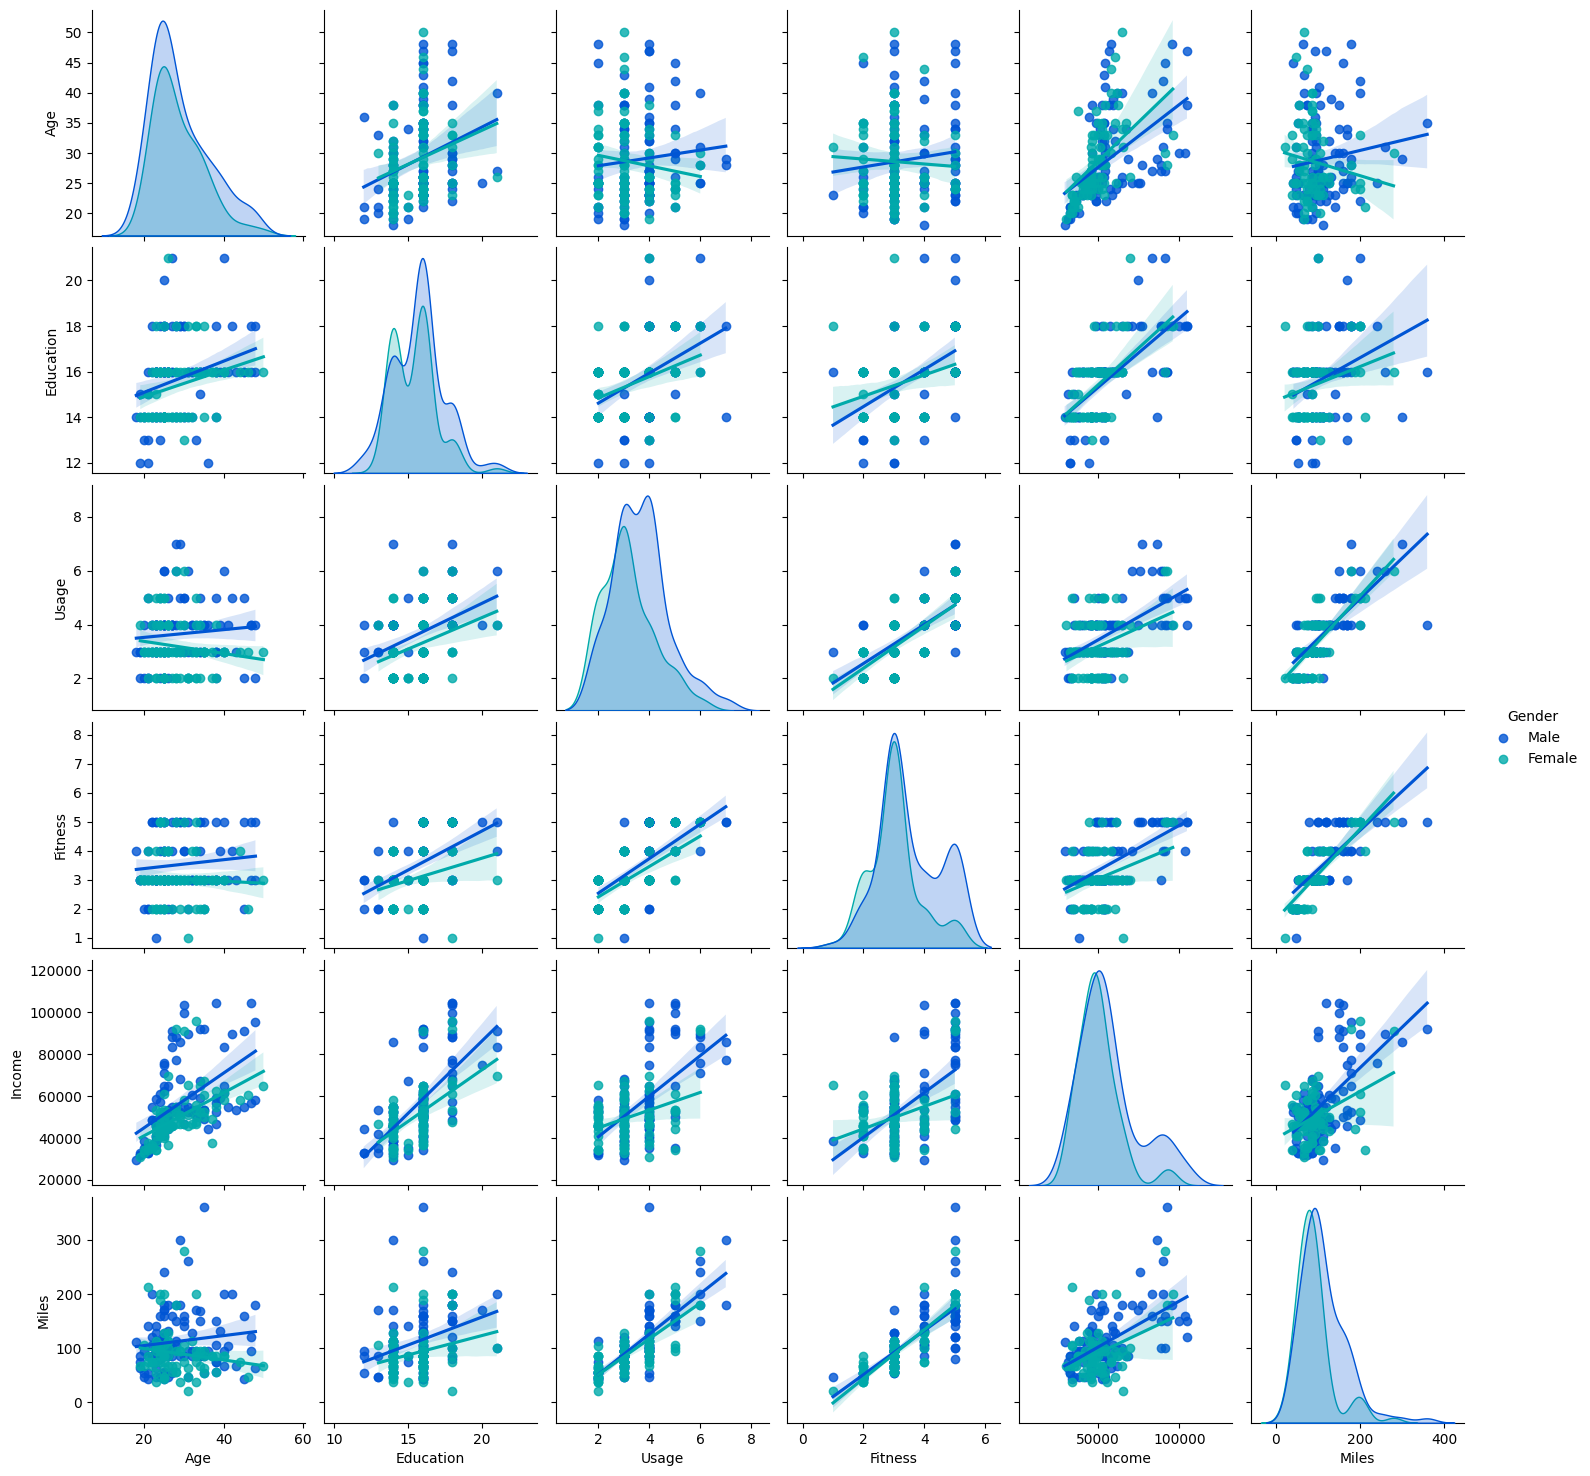

In [ ]:
# pairplot
rcParams['figure.figsize'] = 20, 7
sns.pairplot(aerofit, palette='winter', hue='Gender', kind='reg')
plt.show()

Same conclusion as heatmap (correlation).

<h3><font color="red" style="sans-serif">Univariate Analysis</font></h3>


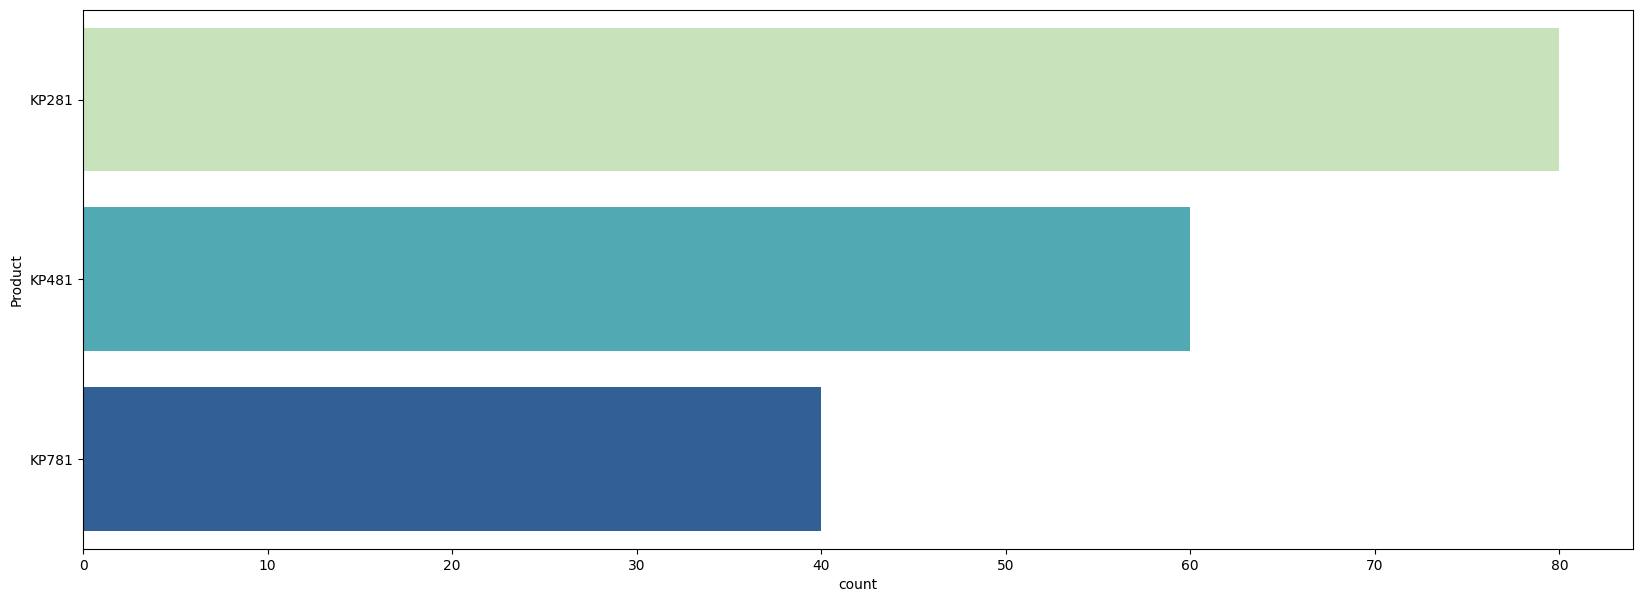

In [ ]:
# Product
sns.countplot(data=aerofit, y='Product', palette='YlGnBu')
plt.show()

<h4><font color="cyan" style="sans-serif">Observations</font></h4>

1. KP281 is the most purchased product having the count of 80.
2. KP481 is the second most purchased product having the count of 60.
3. Lastly KP781 is the purchased product having the count of 40.


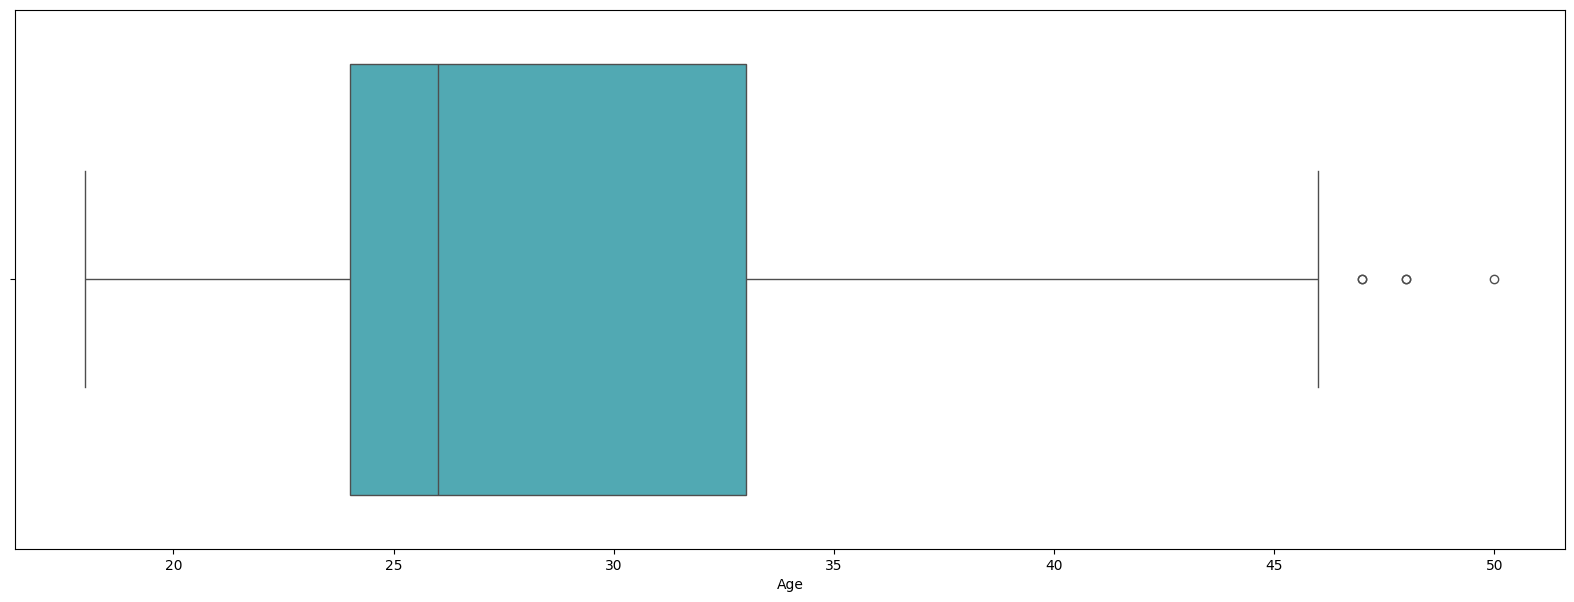

In [ ]:
# Product
sns.boxplot(data=aerofit, x='Age', palette='YlGnBu')
plt.show()

In [ ]:
q75, q25 = np.percentile(aerofit['Age'], [75 ,25])
age_iqr = q75 - q25
print("Inter Quartile Range (IQR) of Age is", age_iqr)

Inter Quartile Range (IQR) of Age is 9.0


<h4><font color="cyan" style="sans-serif">Observations</font></h4>

1. Most common age range is roughly between 22 - 32.
2. There are few data points whose age is more than 46 years (Outlier).
3. Difference between 25th and 75th percentile is 9 years.

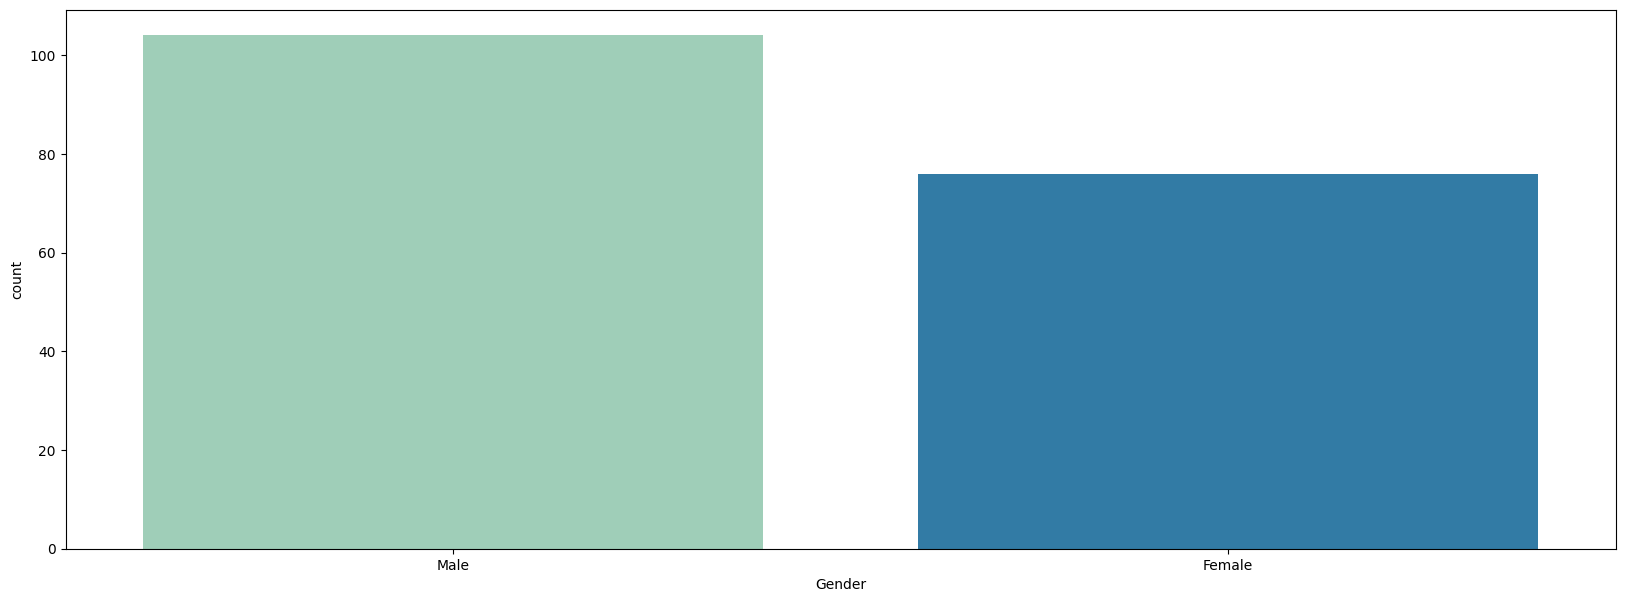

In [ ]:
#Gender
sns.countplot(data=aerofit, x="Gender", palette='YlGnBu')
plt.show()

<h4><font color="cyan" style="sans-serif">Observations</font></h4>

1. Male is the most frequent buyer of the treadmills with count more than 100.
2. Female is the second most frequent buyer with count of roughly 75.

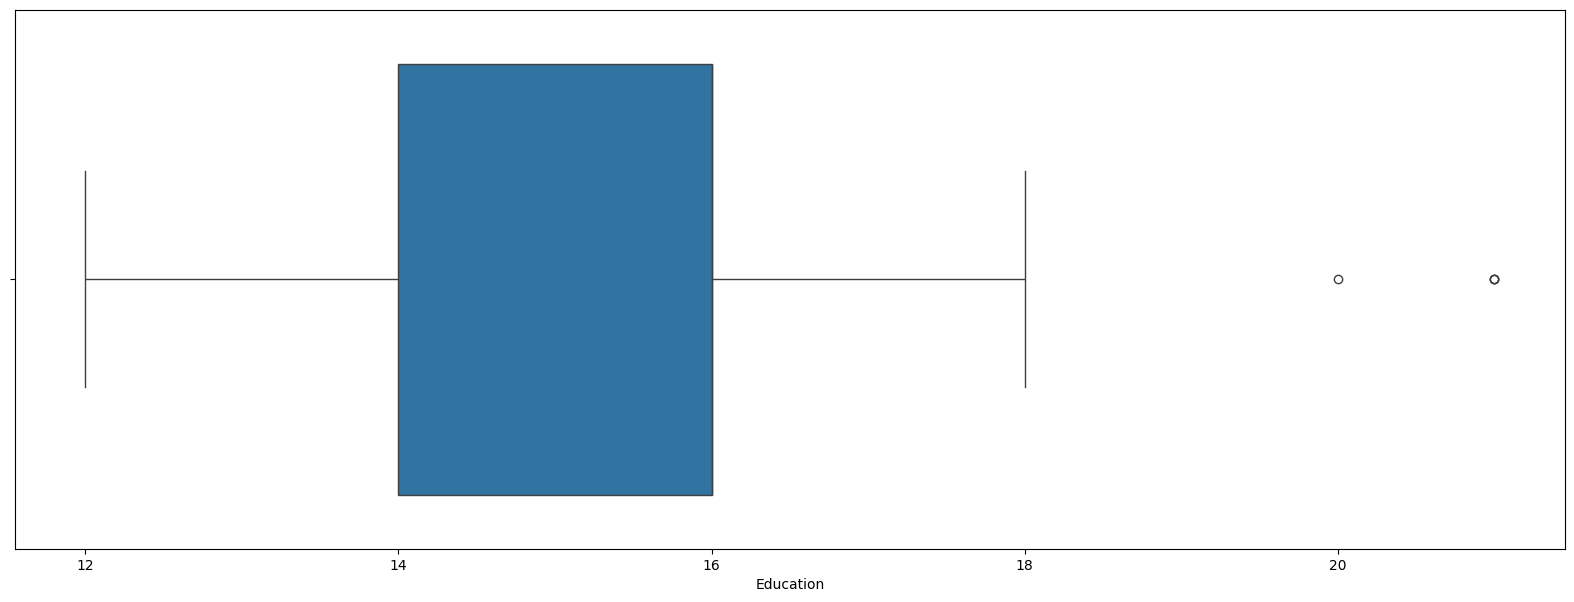

In [ ]:
#Education
sns.boxplot(data=aerofit, x="Education")
plt.show()

In [ ]:
q75, q25 = np.percentile(aerofit['Education'], [75 ,25])
education_iqr = q75 - q25
print("Inter Quartile Range (IQR) of Education is", education_iqr)

Inter Quartile Range (IQR) of Education is 2.0


<h4><font color="cyan" style="sans-serif">Observations</font></h4>

1. Majority of the people have education between 14-16 years.
2. There are only two people who have education more than 20 years (Outlier).
3. Difference between 25th and 75th percentile is 2 years.

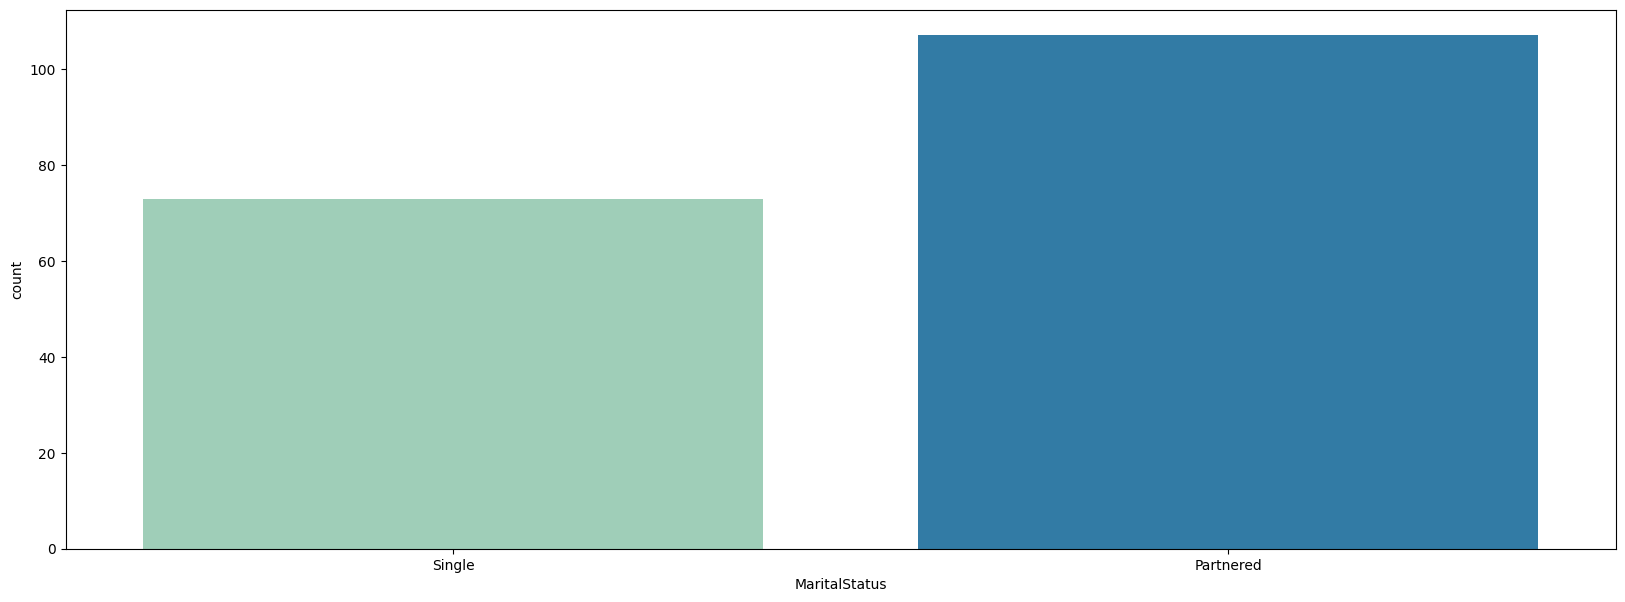

In [ ]:
#Martial Status
sns.countplot(data=aerofit, x='MaritalStatus', palette='YlGnBu')
plt.show()

<h4><font color="cyan" style="sans-serif">Observations</font></h4>

1. Couples are the most frequent buyers of the treadmill with count of more than 100.
2. Singles are the 2nd most frequent buyers of the treadmill with count of roughly 75.

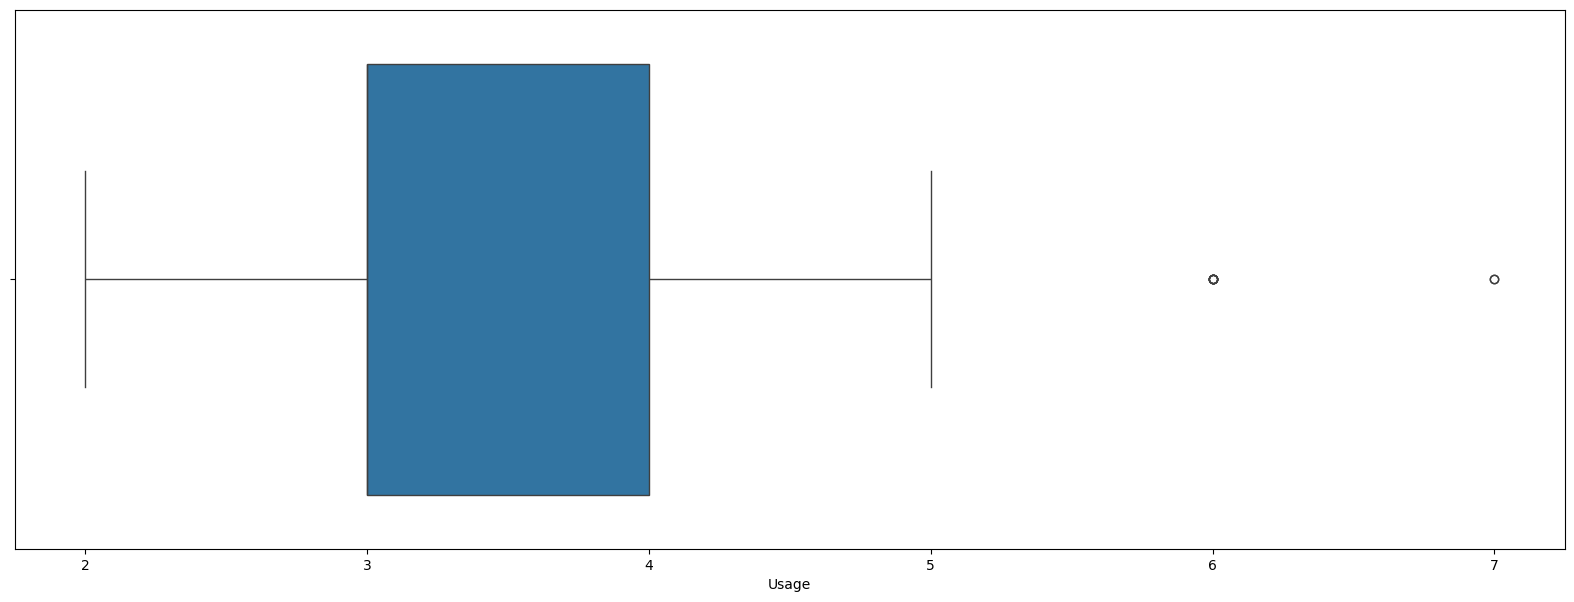

In [ ]:
sns.boxplot(data=aerofit, x='Usage')
plt.show()

In [ ]:
q75, q25 = np.percentile(aerofit['Usage'], [75 ,25])
usage_iqr = q75 - q25
print("Inter Quartile Range (IQR) of Usage is", usage_iqr)

Inter Quartile Range (IQR) of Usage is 1.0


<h4><font color="cyan" style="sans-serif">Observations</font></h4>

1. Most of the customers use treadmill 3 - 4 times per week.
2. Very few people walk/run on treadmill 6 - 7 times per week (Outlier).
3. Difference between 25th and 75th percentile is 1.0.
4. Overall, it looks like very few people are regular in their workouts, while others are working-out casually.

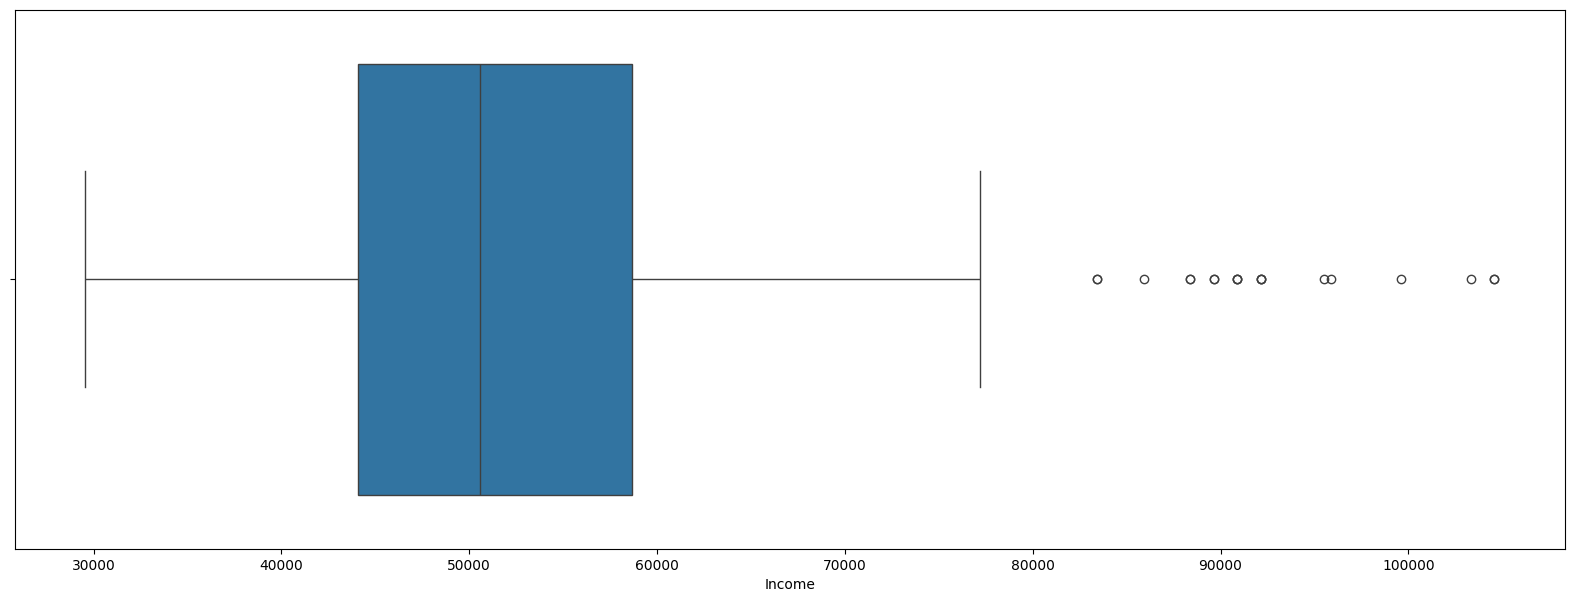

In [ ]:
sns.boxplot(data=aerofit, x='Income')
plt.show()

In [ ]:
q75, q25 = np.percentile(aerofit['Income'], [75 ,25])
income_iqr = q75 - q25
print("Inter Quartile Range (IQR) of Usage is", income_iqr)

Inter Quartile Range (IQR) of Usage is 14609.25


<h4><font color="cyan" style="sans-serif">Observations</font></h4>

1. Most of the customers have income between 45K\\$ - 60K\\$.
2. Very few people have income more than roughly 85K\\$ - 100K\\$.
3. Difference between 25th and 75th percentile is 14609\\$.

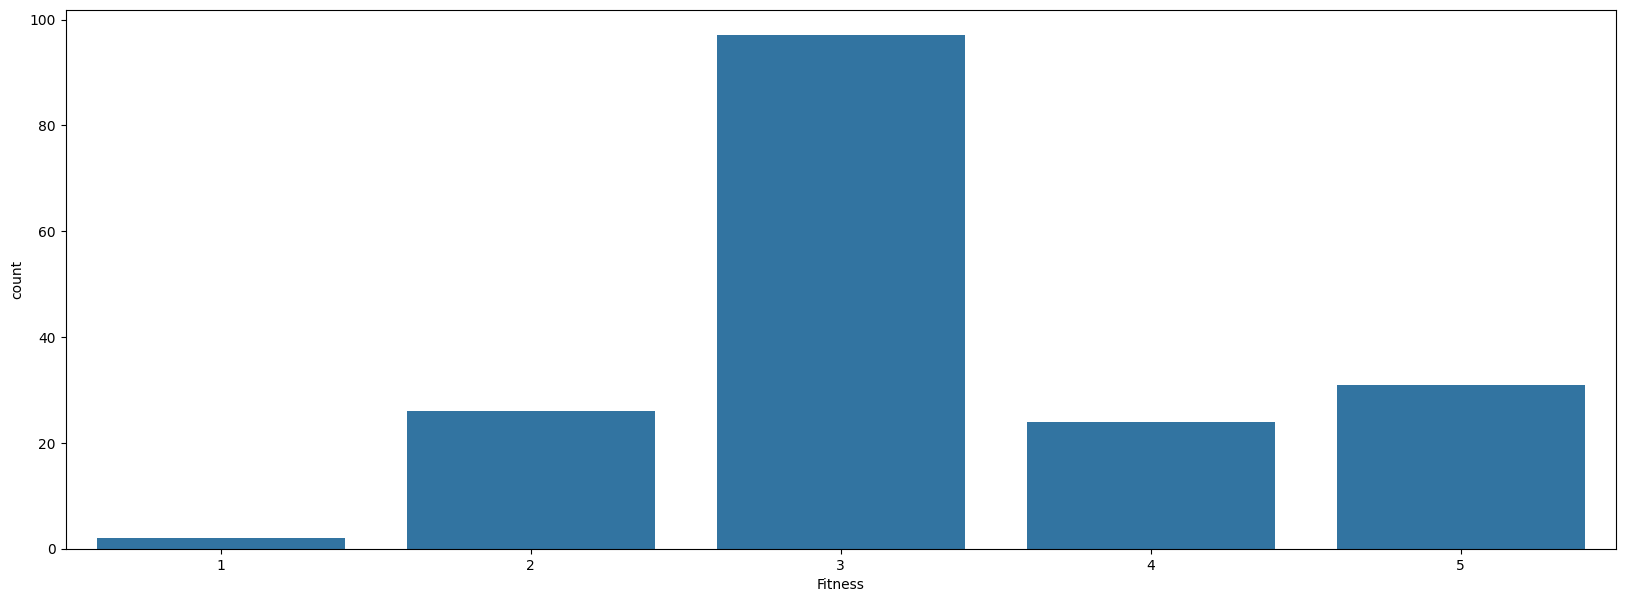

In [ ]:
#fitness
sns.countplot(data=aerofit, x="Fitness")
plt.show()

<h4><font color="cyan" style="sans-serif">Observations</font></h4>

1. Customers who purchased treadmills are moderately fit (Rating - 3).
2. Distribution of customers rating of 2 & 4 are roughly same.
3. Value count of customers of fitness rating 5 is slightly more than 2 and 4.

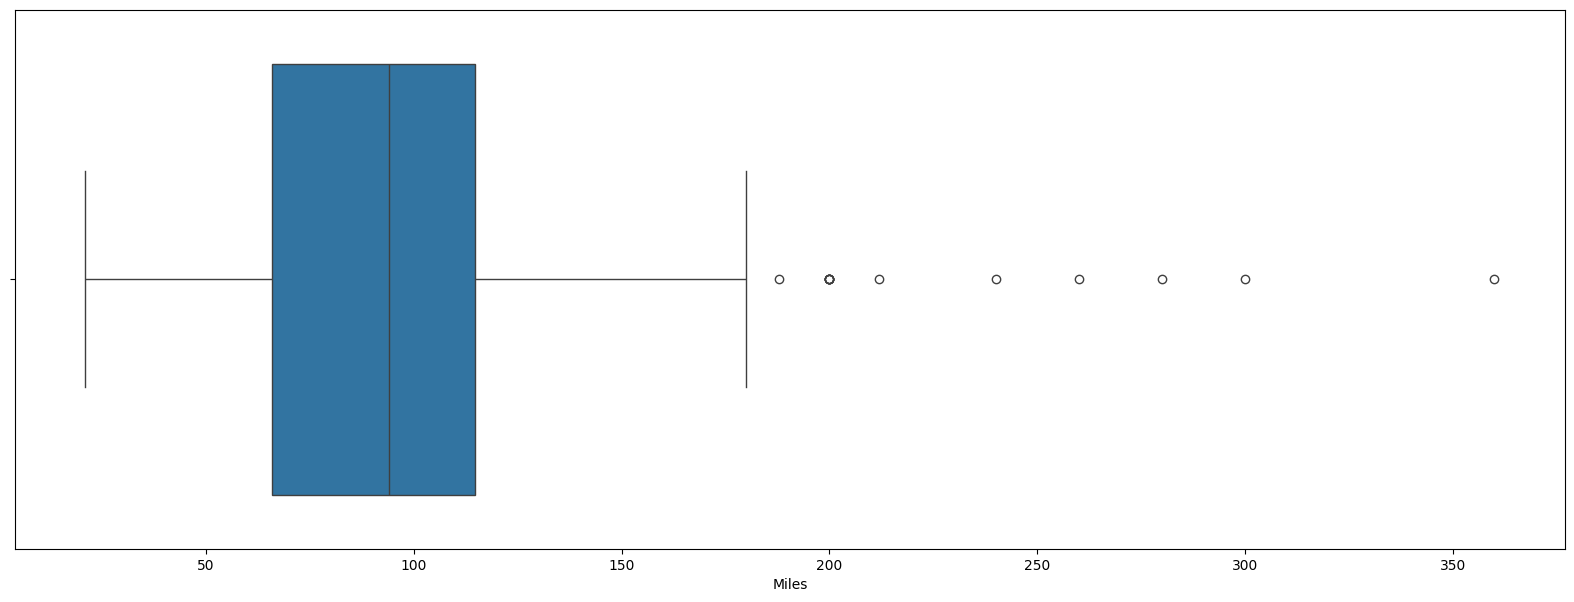

In [ ]:
#miles
sns.boxplot(data=aerofit, x='Miles')
plt.show()

In [ ]:
q75, q25 = np.percentile(aerofit['Miles'], [75 ,25])
miles_iqr = q75 - q25
print("Inter Quartile Range (IQR) of Miles is", miles_iqr)

Inter Quartile Range (IQR) of Miles is 48.75


<h4><font color="cyan" style="sans-serif">Observations</font></h4>

1. Most of the distance travelled by the customer on the treadmill is roughly between 75-120 Miles.
2. Very few people have the travelled more than roughly 200 Miles (Outliers).
3. Difference between 25th and 75th percentile is 48.75 miles (running/walking).

P.S: Correlation between Miles & Fitness is fairly high (0.79).

<h2><font color="red" style="sans-serif">Bivariate Analysis</font><h2>

In [ ]:
#Average Income of customer buying each model
aerofit.groupby('Product')['Income'].mean()

Product
KP281    46418.025
KP481    48973.650
KP781    75441.575
Name: Income, dtype: float64

In [ ]:
#Average Usage of customer buying each model
aerofit.groupby('Product')['Usage'].mean()

Product
KP281    3.087500
KP481    3.066667
KP781    4.775000
Name: Usage, dtype: float64

In [ ]:
#Average Fitness of customer buying each model
aerofit.groupby('Product')['Fitness'].mean()

Product
KP281    2.9625
KP481    2.9000
KP781    4.6250
Name: Fitness, dtype: float64

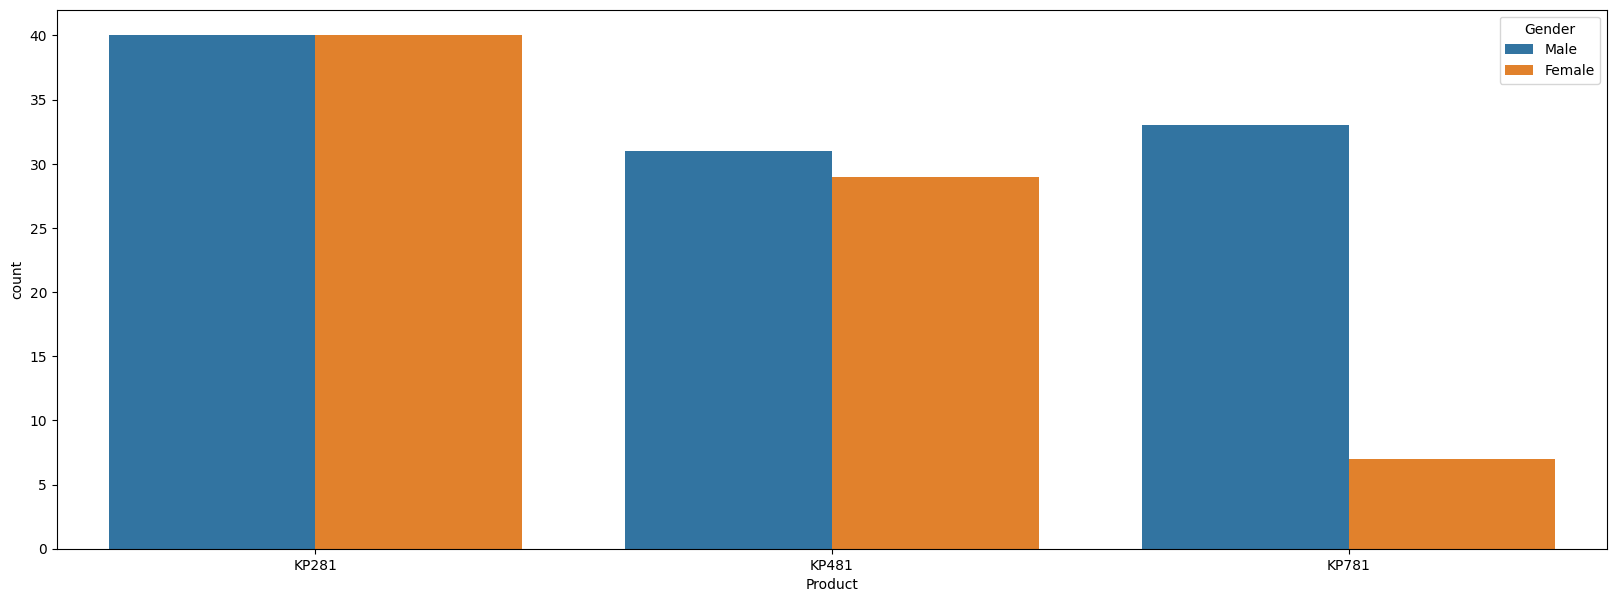

In [ ]:
# Gender & Product
sns.countplot(data=aerofit, x='Product', hue='Gender')
plt.show()

<h4><font color="cyan" style="sans-serif">Observations</font></h4>

1. Most common preference for both gender is KP281.
2. Ratio of Male/Female customers is huge in KP781.
3. Distribution of Male & Female is roughly same for KP481.
4. Males have bought more KP781 compare to KP481.

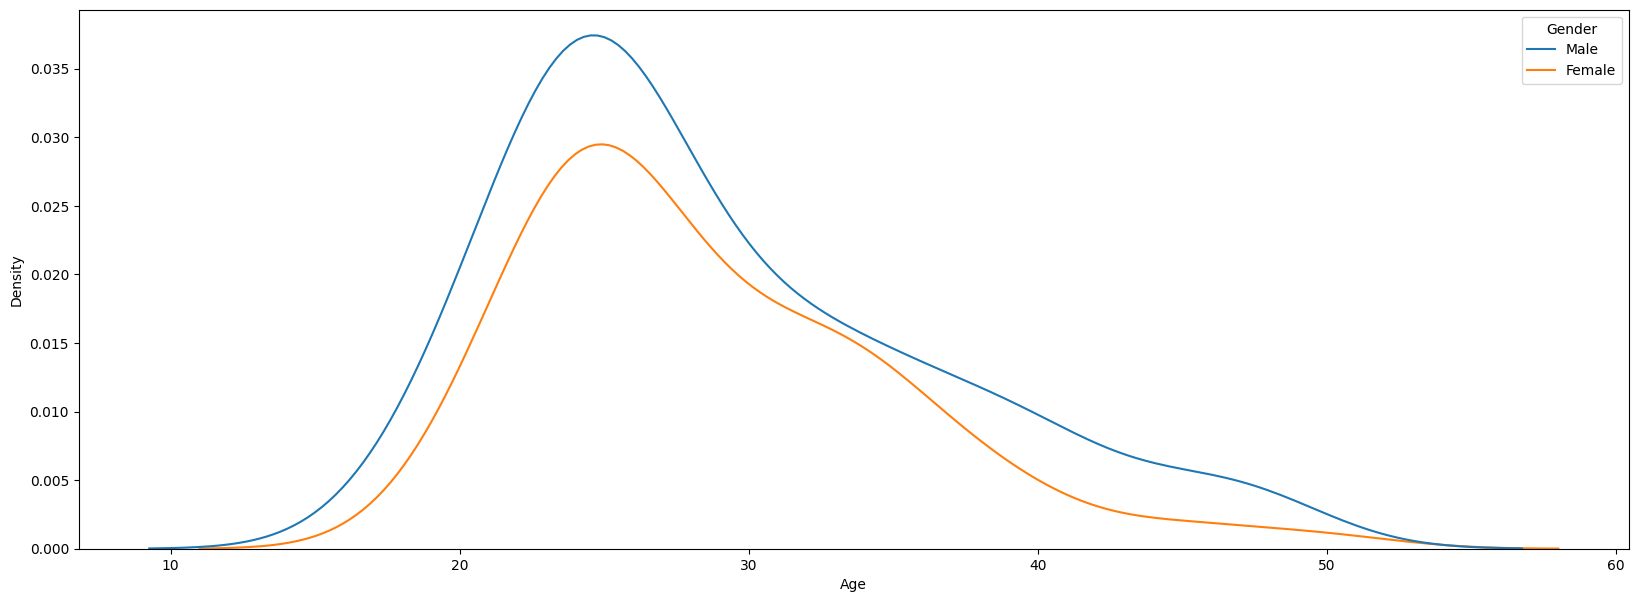

In [ ]:
# Gender & Product
sns.kdeplot(data=aerofit, x='Age', hue='Gender')
plt.show()

<h4><font color="cyan" style="sans-serif">Observations</font></h4>

1. Most of the customers are in the age range of 20-40.
2. Most of the Men are treadmill buyers.

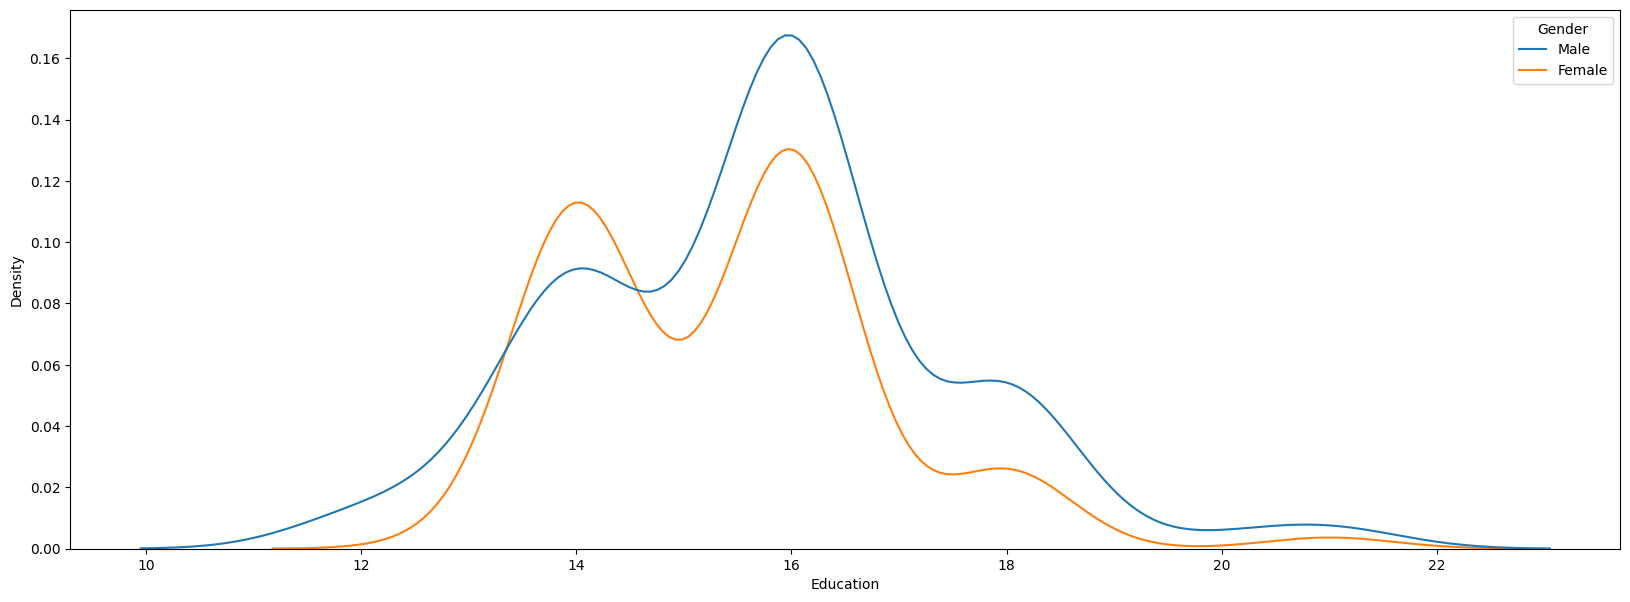

In [ ]:
sns.kdeplot(data=aerofit, x='Education', hue='Gender')
plt.show()

<h4><font color="cyan" style="sans-serif">Observations</font></h4>

1. Both genders have roughly same education years.
2. As the dataset contains majority of Male customers, Education count of male are high.
3. There are some female who has 13-15 years of education.

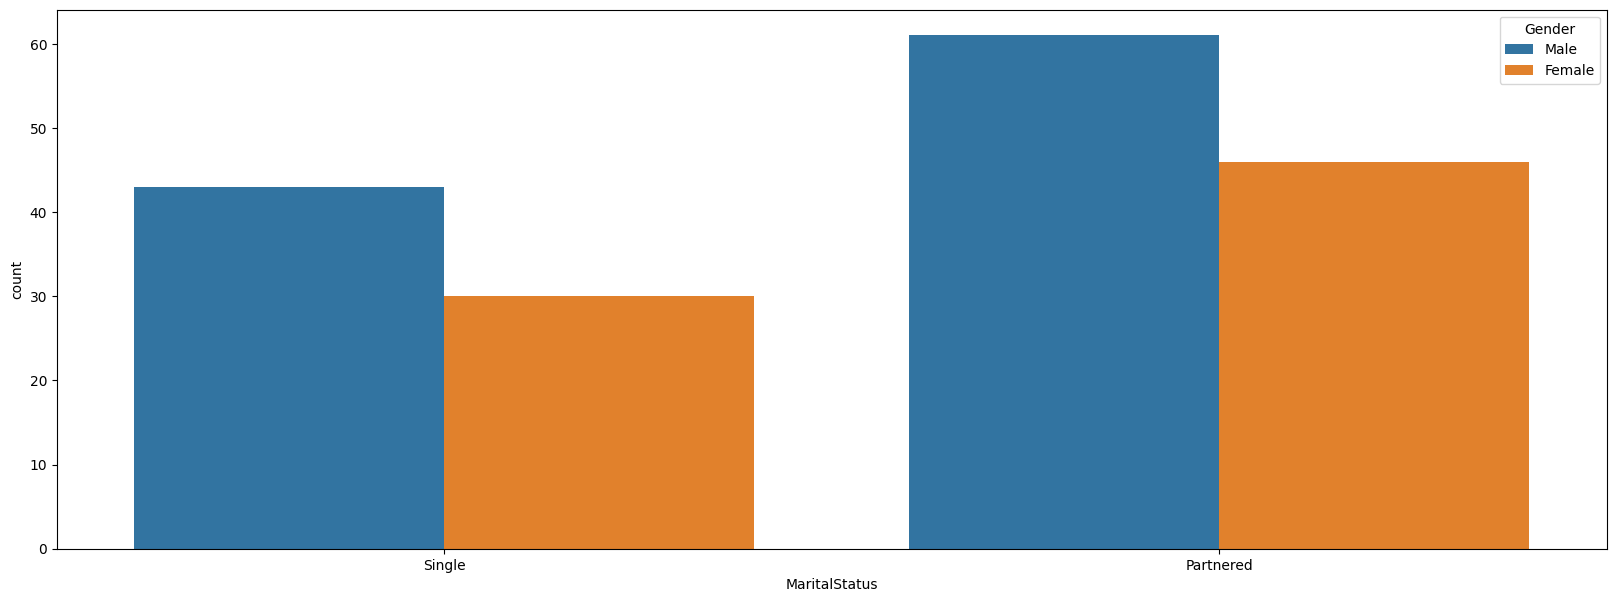

In [ ]:
sns.countplot(data=aerofit, x='MaritalStatus', hue='Gender')
plt.show()

<h4><font color="cyan" style="sans-serif">Observations</font></h4>

1. Irrespective of Martial Status, Men are the most frequent buyer of the treadmill.
2. Partnered female are more frequent buyers compare to Single females.

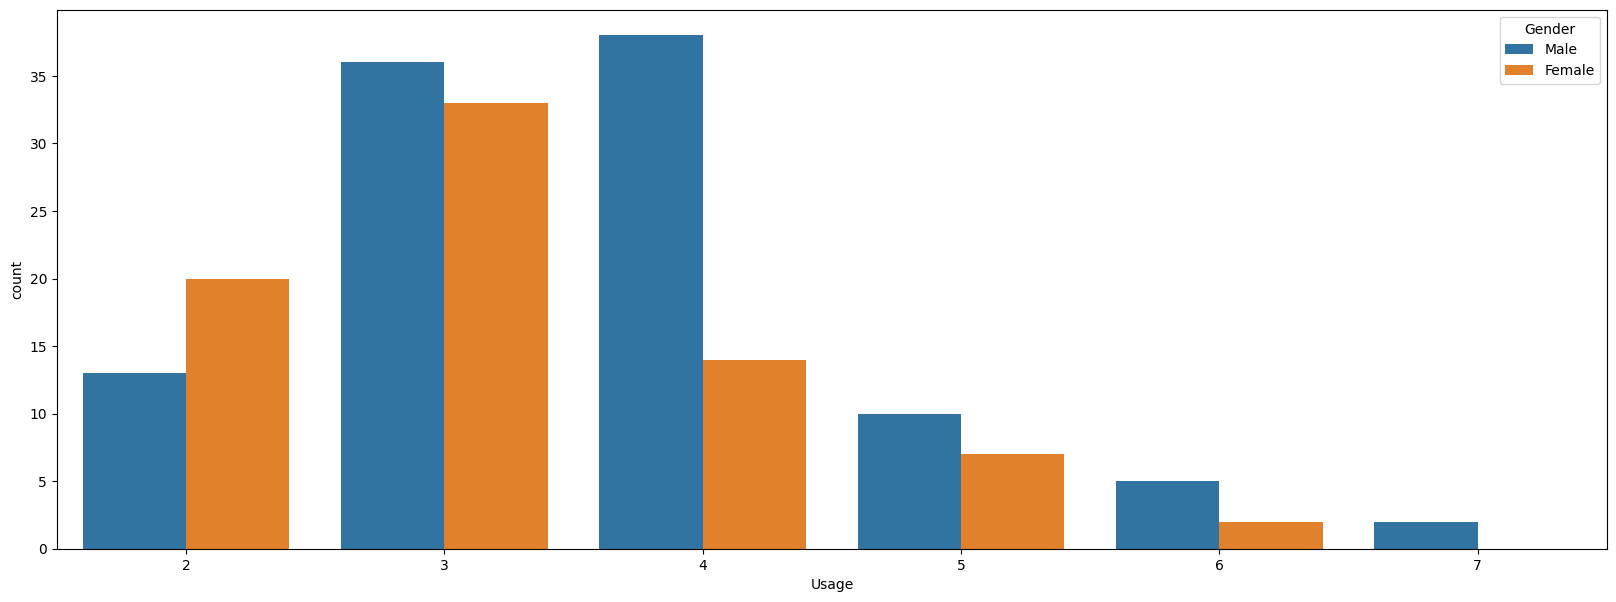

In [ ]:
sns.countplot(data=aerofit, x='Usage', hue='Gender')
plt.show()

<h4><font color="cyan" style="sans-serif">Observations</font></h4>

1. Majority of males seems to use treadmill 4 times per week.
2. Followed by males using 3 times per week. Most of the women seems to use treadmills 3 times per week.
3. Very few males use treadmills 7 times per week, while no female seems to using 7 times per week.


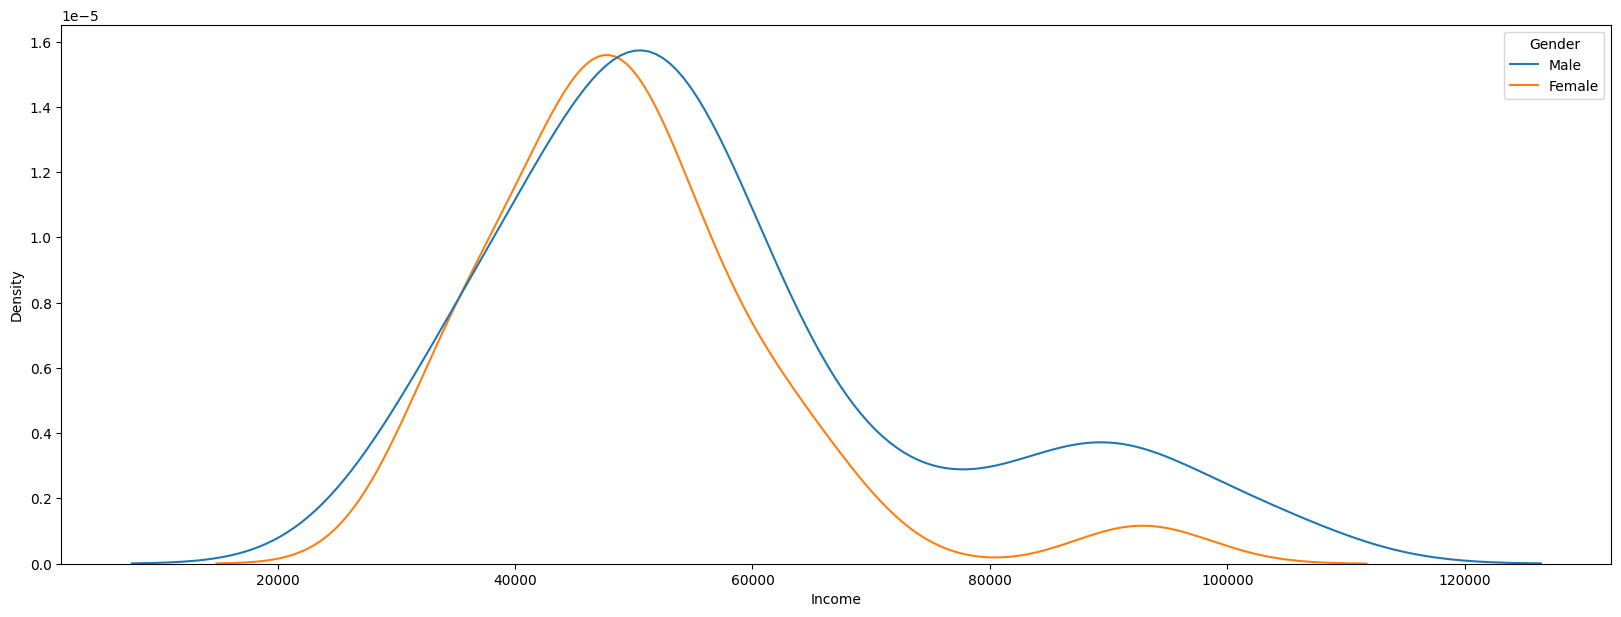

In [ ]:
sns.kdeplot(data=aerofit, x='Income', hue='Gender')
plt.show()

<h4><font color="cyan" style="sans-serif">Observations</font></h4>

1. Peek Income of both genders are roughly same i.e., between 40K - 70K.
2. Majority of the males have annual salary more than 75K, while few female have the same.
3. Distribution of salary less 30K is same in both genders.


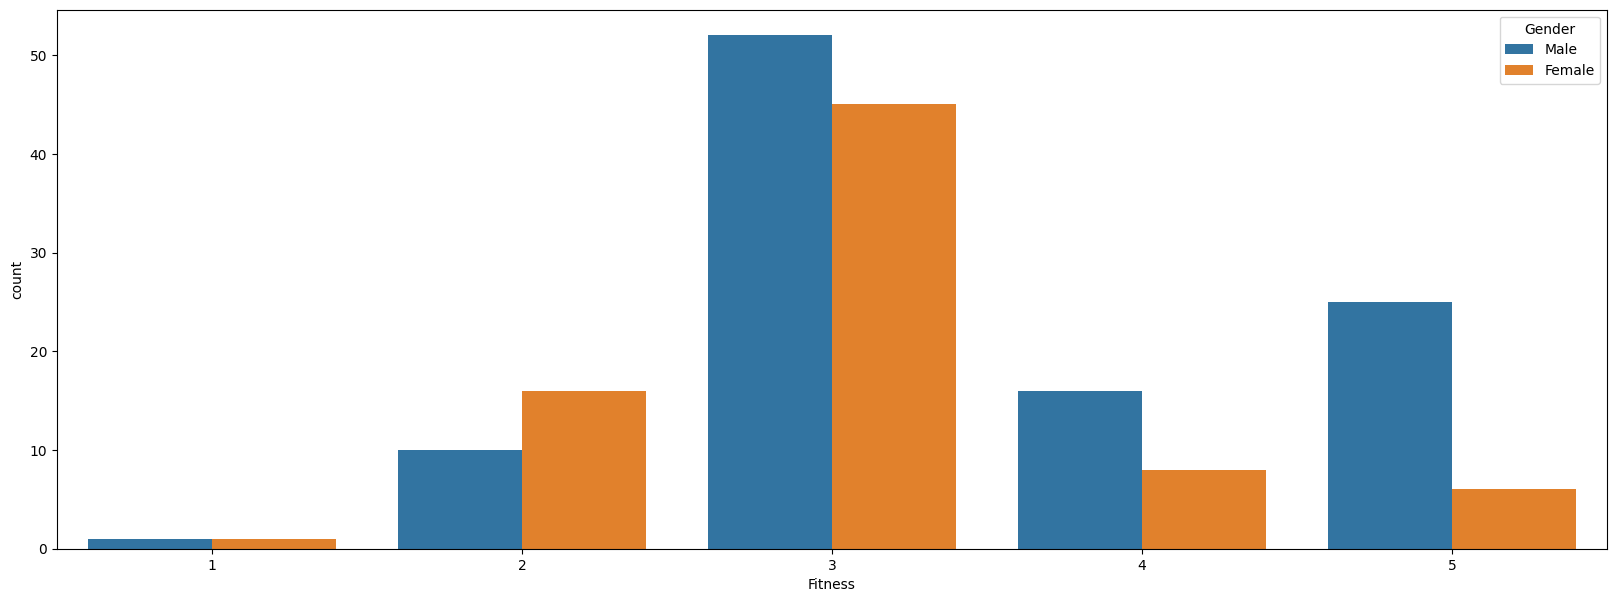

In [ ]:
sns.countplot(data=aerofit, x='Fitness', hue='Gender')
plt.show()

<h4><font color="cyan" style="sans-serif">Observations</font></h4>

1. Both genders are moderately fit (Fitness scale 3).
2. There are more men who have self-rating of 5 compare to women.
3. Distribution of self-rating 1 for both genders is roughly same.
4. There are more women who have self-rating of 2 compare to men.


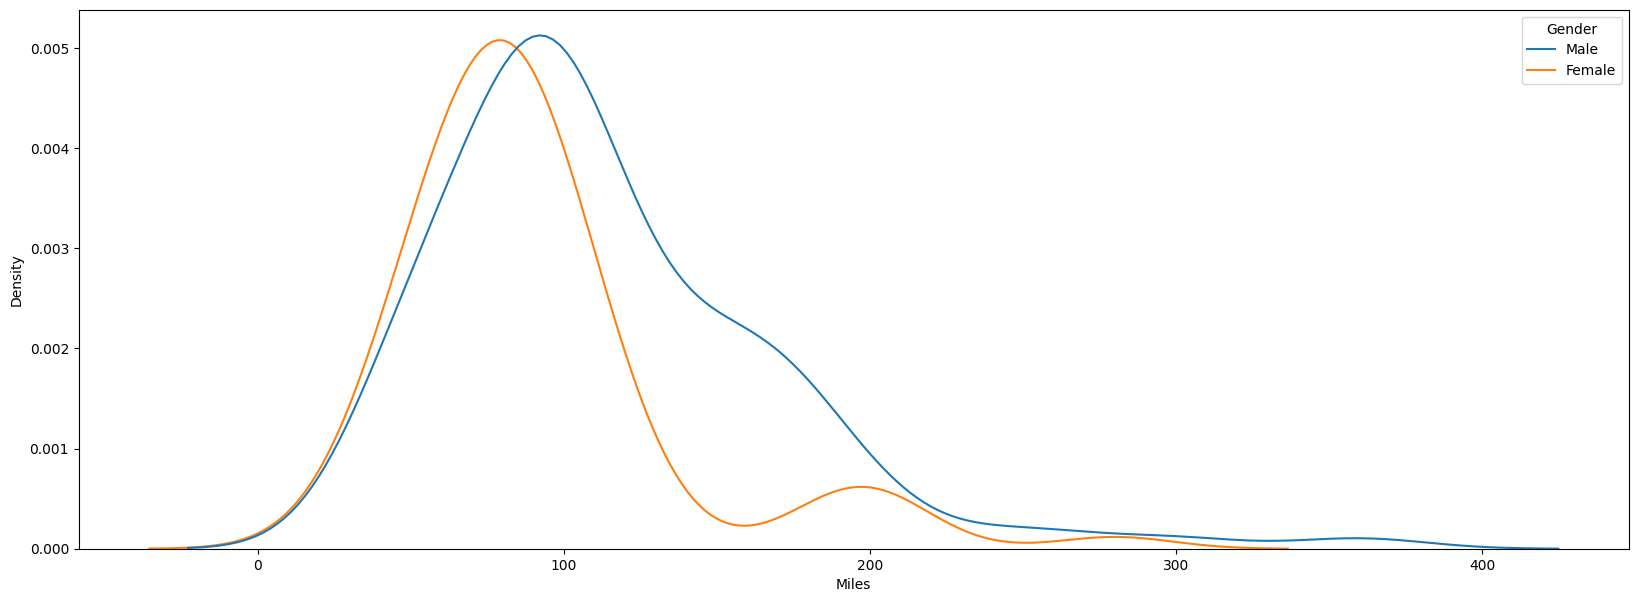

In [ ]:
sns.kdeplot(data=aerofit, x='Miles', hue='Gender')
plt.show()

<h4><font color="cyan" style="sans-serif">Observations</font></h4>

1. Both gender have peak miles **roughly** between 80-100 miles.
2. Very few males walk/run on treadmill for more than **roughly** 320 miles, while few females walk/run for 320 miles.
3. Distribution starts to deviate onwards 150 miles as the gap starts to increase and the gap stops at 200 miles.


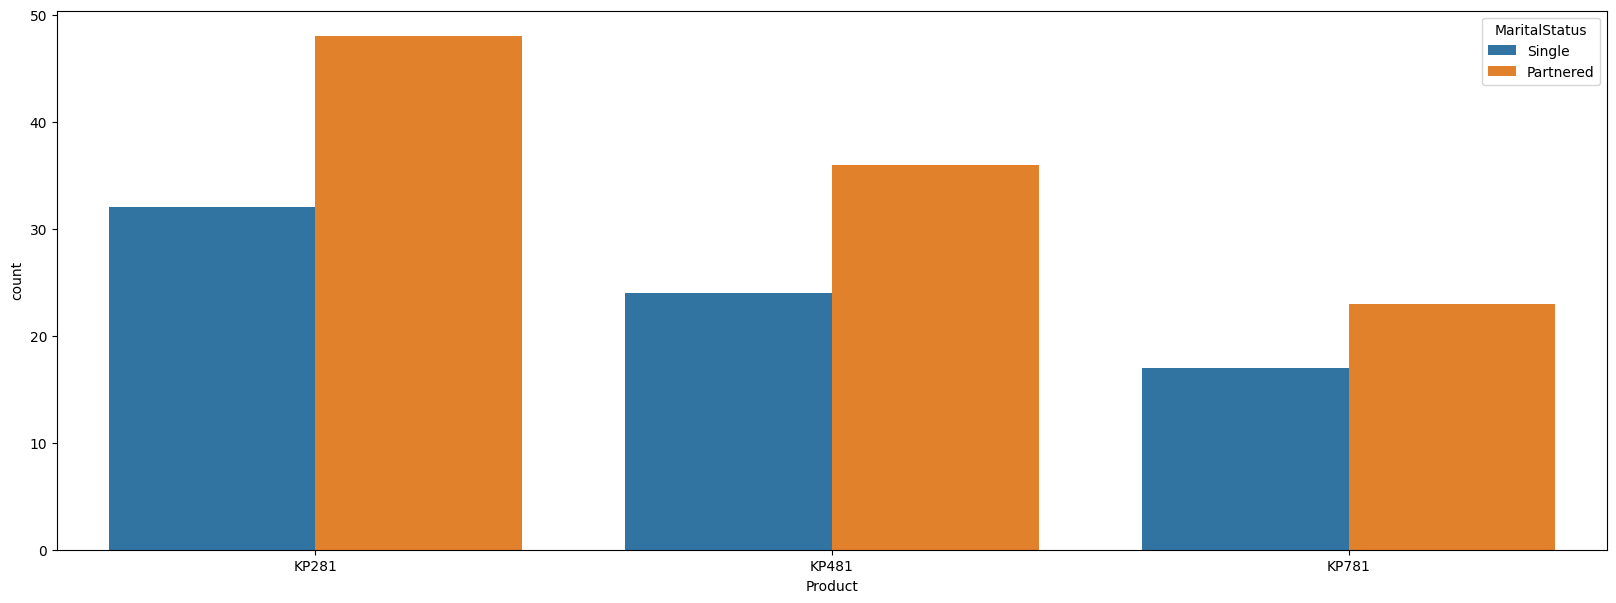

In [ ]:
# Preferred product of Couples and Singles
sns.countplot(data=aerofit, x="Product", hue='MaritalStatus')
plt.show()

<h4><font color="cyan" style="sans-serif">Observations</font></h4>

1. Most preferred product for married couples is KP281. It is also the preferred prdouct of Singles as well.
2. Followed by KP481 & KP781 respectively.
3. Maybe it's because KP281 is cheaper than KP481 and KP781.



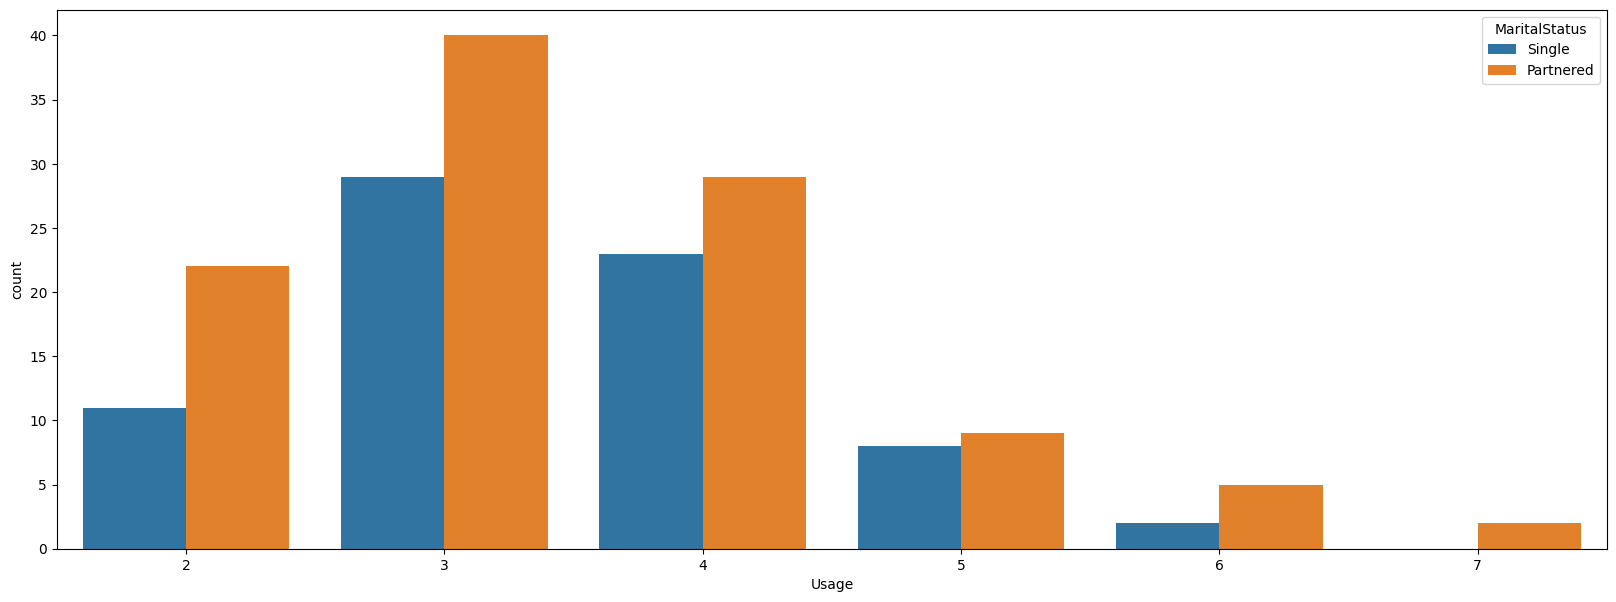

In [ ]:
# Usage of Couples and Singles
sns.countplot(data=aerofit, x="Usage", hue='MaritalStatus')
plt.show()

<h4><font color="cyan" style="sans-serif">Observations</font></h4>

1. Overall usage of married couples is more compare to Singles.
2. Irrespective of Martial Status, usage is 3 times per week. Followedby 4 times per week.
3. Partnered status have small sample of doing workout 7 times per week, while no single people have more than 6 times per week.



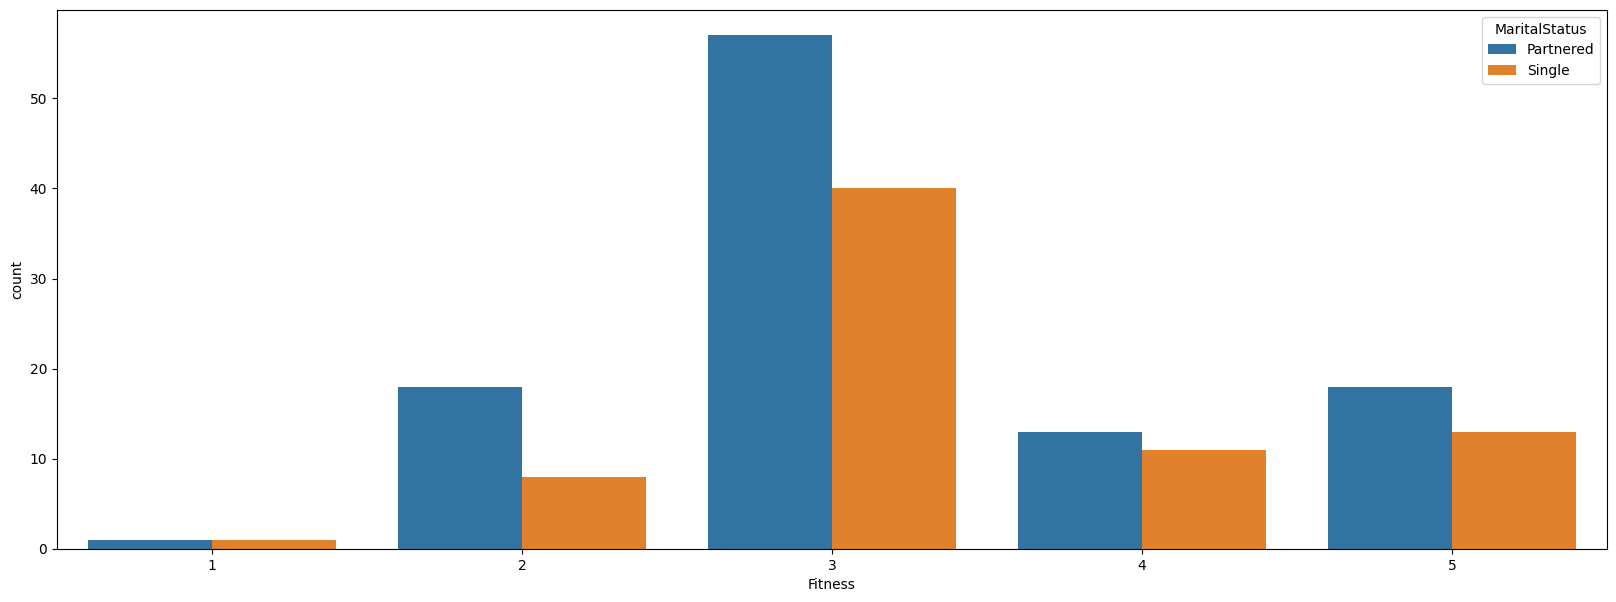

In [ ]:
# Fitness of Couples and Singles
sns.countplot(data=aerofit, x="Fitness", hue='MaritalStatus')
plt.show()

<h4><font color="cyan" style="sans-serif">Observations</font></h4>

1. Most of the customers are moderately fit irrespective of their Martial Status.
2. Followed by Fitness rating of 5 where majority of customers are married.
3. Fitness rating of 1 is same for Single and Married people. Same thing can be seen in fitness vs gender graph.



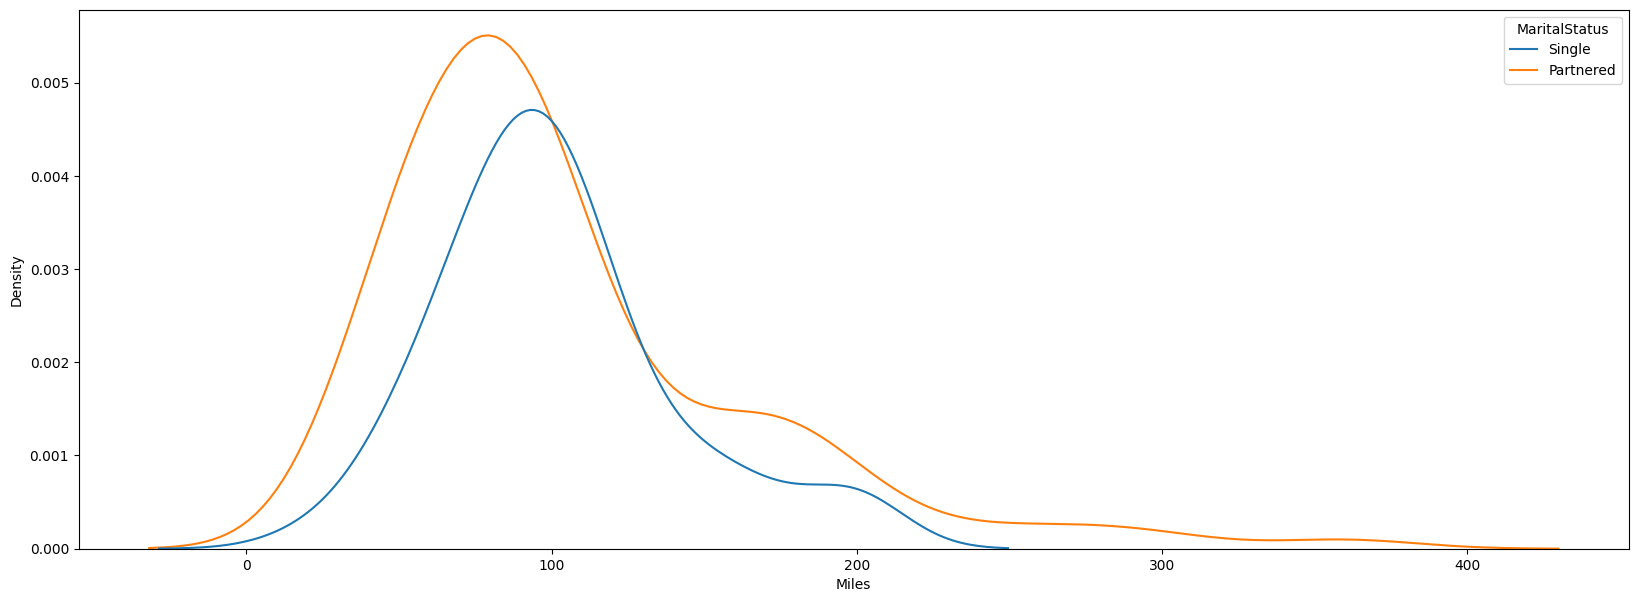

In [ ]:
# Miles (walk/run) of Couples and Singles
sns.kdeplot(data=aerofit, x="Miles", hue='MaritalStatus')
plt.show()

<h4><font color="cyan" style="sans-serif">Observations</font></h4>


1.   Partnered status prefers to workout more on treadmills.
2.   Distribution of Single & Partnered tends overlap at 100-150 miles.
3.   Parterned tends to workout even after 200 miles, where 200 is the upper limit of singles.



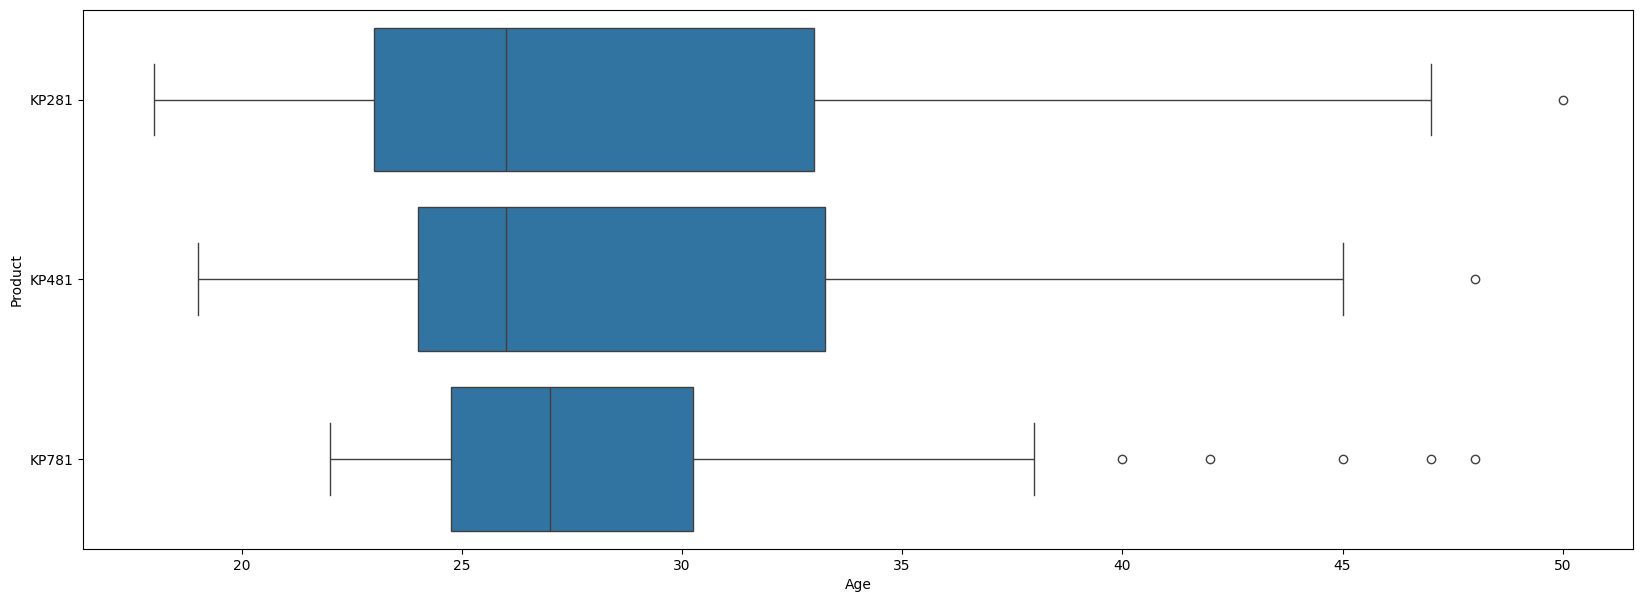

In [ ]:
#sns.boxplot(aerofit['Age'],aerofit['Product'])
#plt.show()

sns.boxplot(x=aerofit['Age'], y=aerofit['Product'])
plt.show()

<h4><font color="cyan" style="sans-serif">Observations</font></h4>

1. Age distribution in KP281 is maximum, followed by KP481, and KP781 respectively.
2. There is only one outlier in KP281, followed by one and five outliers in KP481 and KP781 respectively.
3. Buyer of KP281 is in the range of roughly 22 - 33 years.
4. Buyer of KP481 is in the range of roughly 24 - 34 years.
5. Buyer of KP781 is in the range of roughly 25 - 30 years.


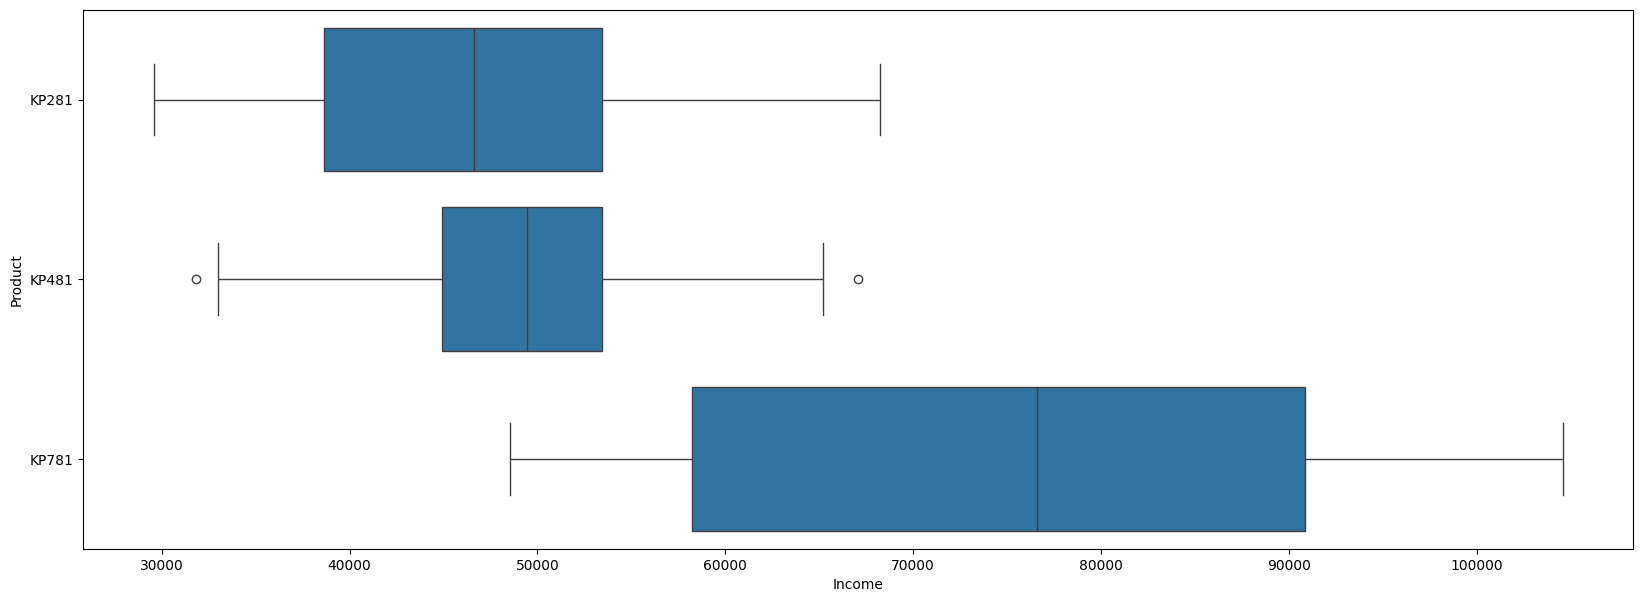

In [ ]:
 #sns.boxplot(aerofit['Income'],aerofit['Product'])
 #plt.show()

sns.boxplot(x=aerofit['Income'],y=aerofit['Product'])
plt.show()

<h4><font color="cyan">Observations</font></h4>

1. Income distribution in KP781 is maximum, followed by KP281, and KP481 respectively.
2. There is no outlier in KP781 and KP281, while KP481 has two outliers at extreme ends i.e., Lower IQR and Upper IQR.
3. Income distribution of KP281 buyer is roughly between 39K - 53K dollars.
4. Income distribution of KP481 buyer is roughly between 45K - 53K dollars.
5. Income distribution of KP781 buyer is roughly between 59K - 92K dollars.


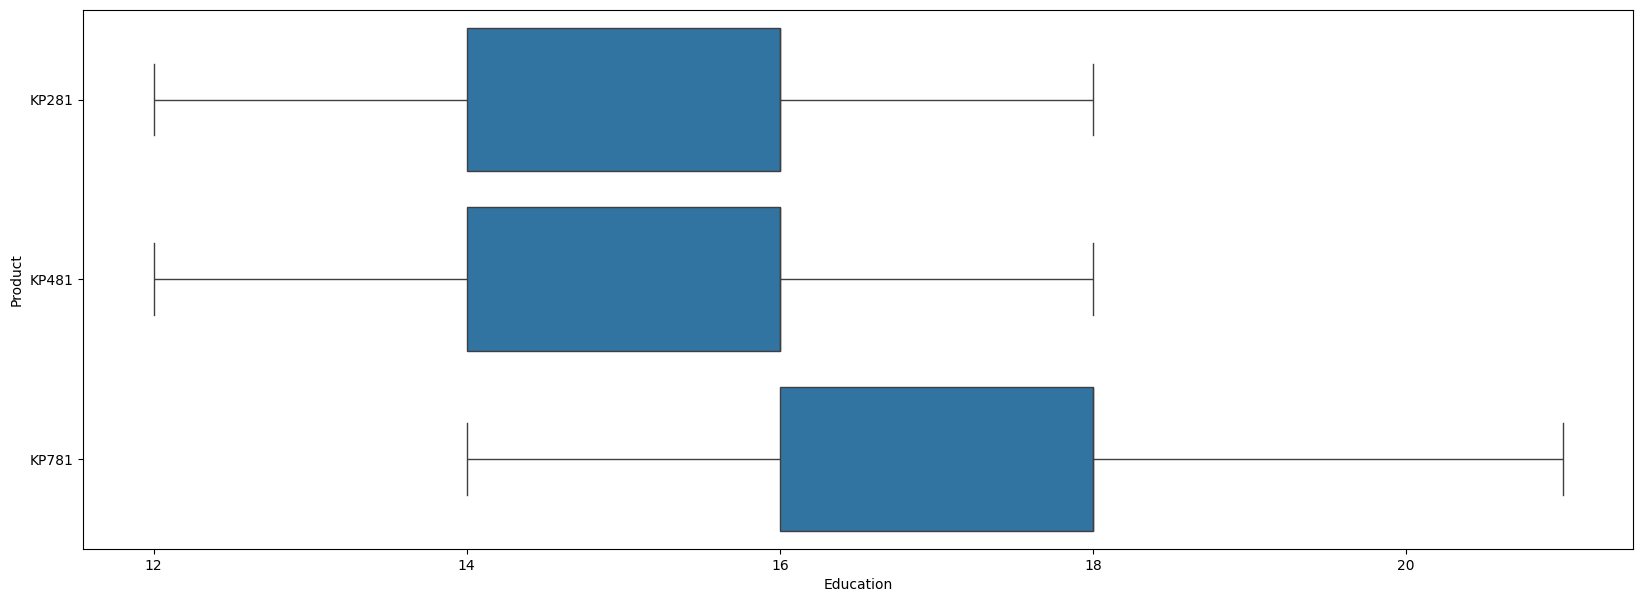

In [ ]:
 #sns.boxplot(aerofit['Education'],aerofit['Product'])
 #plt.show()

sns.boxplot(x=aerofit['Education'],y=aerofit['Product'])
plt.show()

<h4><font color="cyan">Observations</font></h4>

1. Distributions of Education for all three models is same.
2. Range of distribution for KP281 and KP481 is exactly same i.e., 14 - 16 years.
3. Range of distribution for KP781 is between 16 - 18 years of education.
4. There is no outlier for all three models w.r.t Education.
5. People with more education years tend to buy KP781 as correlation between Education & Income is high (0.63).


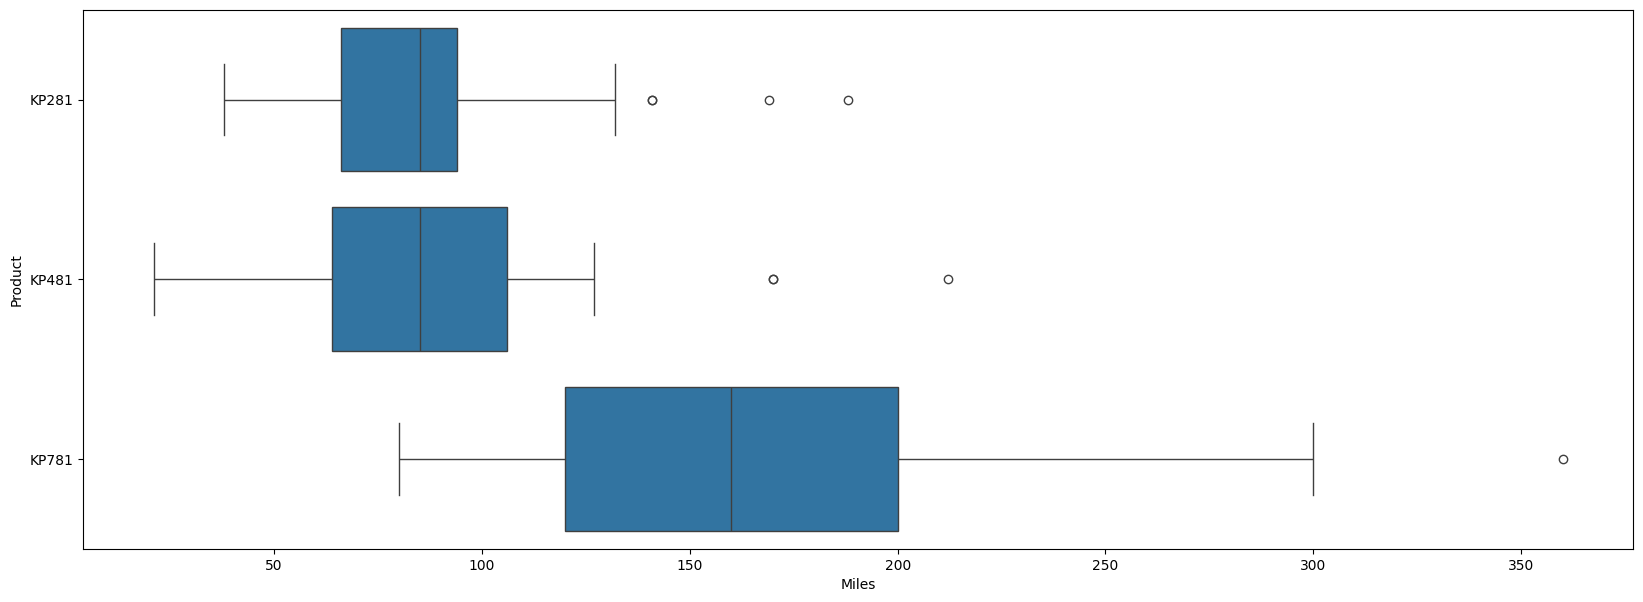

In [ ]:
#sns.boxplot(aerofit['Miles'],aerofit['Product'])
#plt.show()

sns.boxplot(x=aerofit['Miles'],y=aerofit['Product'])
plt.show()

<h4><font color="cyan">Observations</font></h4>

1. Distribution of Miles is maximum in KP781, followed by KP481 and KP281, respectively.
2. People tend to workout more on KP781, range is roughly between 125 Miles - 200 Miles.
3. Range of Miles on KP481 is roughly between 75 - 100 Miles.
4. Range of Miles on KP281 is roughly between 75 - 80 Miles.
5. There is only one outlier in KP781 w.r.t Miles, followed by two and three in KP481 and KP281 respectively.


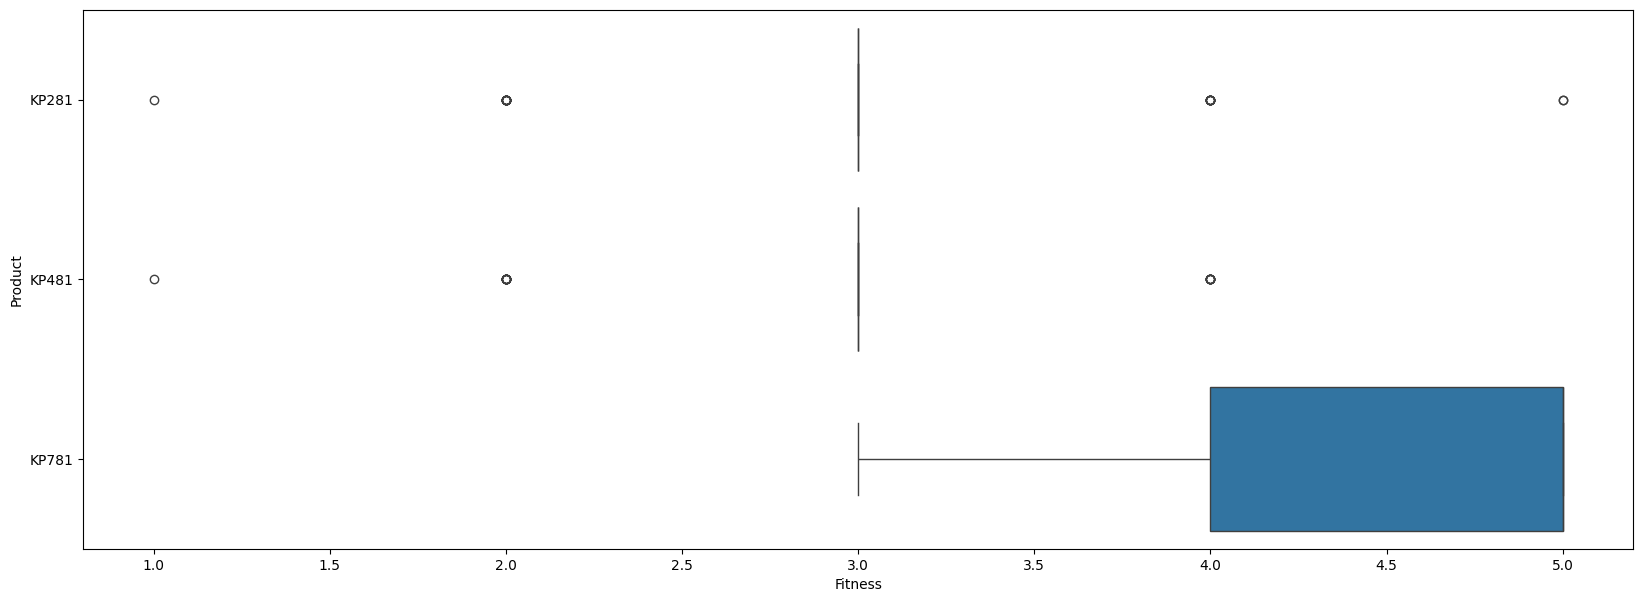

In [ ]:
#sns.boxplot(aerofit['Fitness'],aerofit['Product'])
#plt.show()


sns.boxplot(x=aerofit['Fitness'], y=aerofit['Product'])
plt.show()

<h4><font color="cyan">Observations</font></h4>

1. Fitness Distribution of KP781 is maximum, while for KP281 and KP481 distribution is same.
2. There's no outlier in fitness rating w.r.t to KP781, while there's three and four outliers in KP481 and KP281, respectively.
3. Fitness Median of KP281 and KP481 is same.

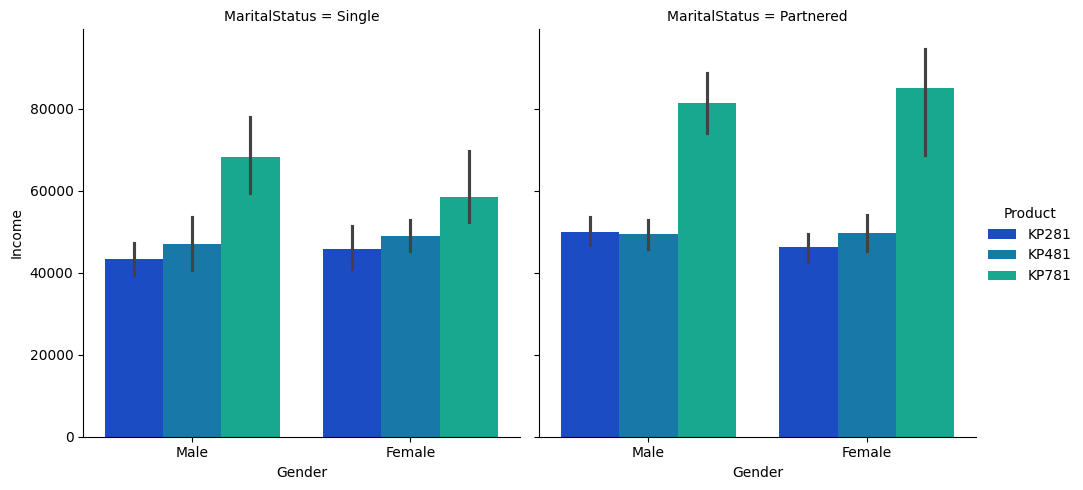

In [ ]:
# Income by gender by product and by marital status
sns.catplot(x='Gender',y='Income', hue='Product', col='MaritalStatus', data=aerofit, kind='bar', palette='winter')
plt.show()

<h4><font color="cyan" style="sans-serif">Observations</font></h4>

1. Partnered Female bought KP781 treadmill compared to Partnered Male.
2. Single Female customers bought KP281 treadmill slightly more compared to Single Male customers.
3. Partnered Male customers bought KP281 treadmill slightly more than Single Male customers.
4. There are more single Males buying treadmill than single Females.
5. Single Male customers bought KP781 treadmill compared to single Female.
6. Distribution of KP481 in Single & Parterned, Male & Female is same.
7. Partnered customers are more than Single customers.

In [ ]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 20,5

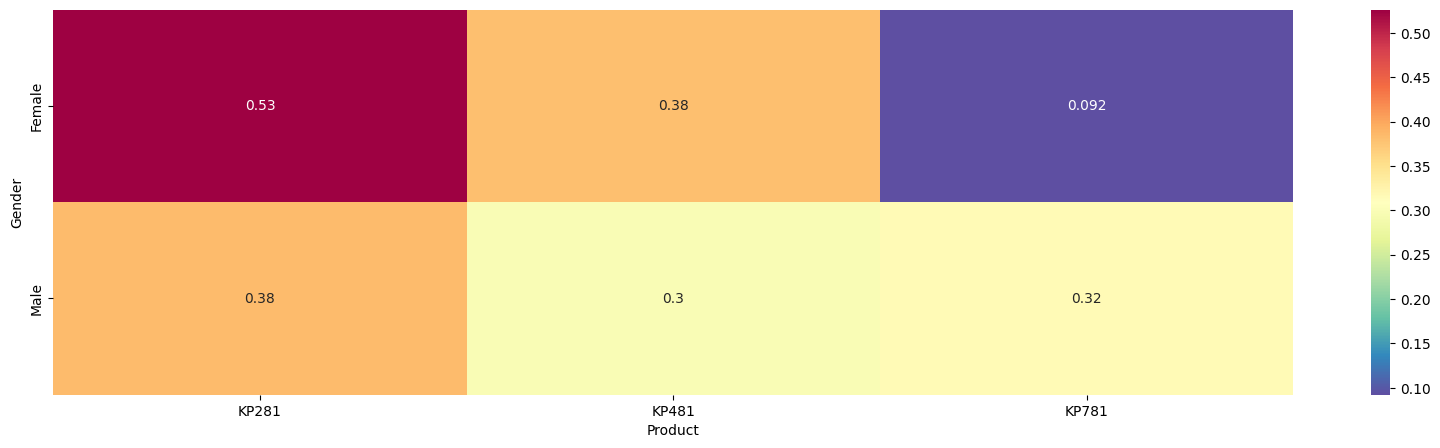

In [ ]:
sns.heatmap(pd.crosstab(aerofit['Gender'], aerofit['Product'], normalize='index'), annot=True, cmap='Spectral_r')
plt.show()

<h4><font color="cyan" style="sans-serif">Conditional Probability, P(Product | Gender)</font></h4>


1.   Probability of buying KP281 given that the customer is male, P(Product=KP281 | Customer=Male) = 0.38.
2.   Probability of buying KP481 given that the customer is male, P(Product=KP481 | Customer=Male) = 0.3.
3.   Probability of buying KP781 given that the customer is male, P(Product=KP781 | Customer=Male) = 0.32.

1.   Probability of buying KP281 given that the customer is female, P(Product=KP281 | Customer=Female) = 0.53.
2.   Probability of buying KP481 given that the customer is female, P(Product=KP481 | Customer=Female) = 0.38.
3.   Probability of buying KP781 given that the customer is female, P(Product=KP781 | Customer=Female) = 0.092.



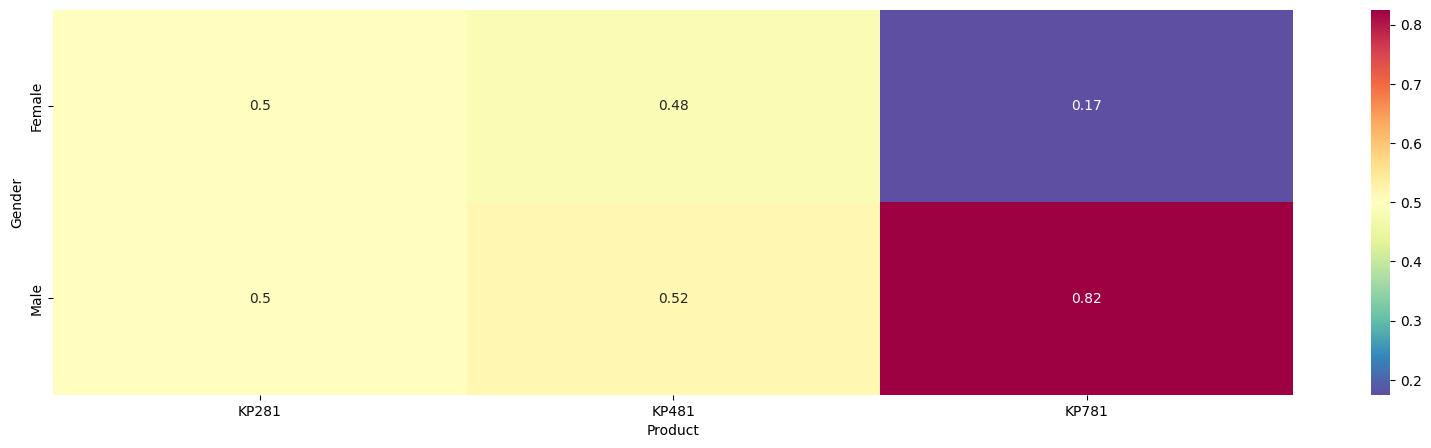

In [ ]:
sns.heatmap(pd.crosstab(aerofit['Gender'], aerofit['Product'], normalize='columns'), annot=True, cmap='Spectral_r')
plt.show()

<h4><font color="cyan" style="sans-serif">Conditional Probability, P(Gender | Product)</font></h4>


1.   Probability that customer is Male given that he bought KP281, P(Customer=Male | Producty=KP281) = 0.50.

2.   Probability that customer is Female given that she bought KP281, P(Customer=Female | Product=KP281) = 0.50.

3.   Probability that customer is Male given that he bought KP481, P(Customer=Male | Product=KP481) = 0.52.

4.   Probability that customer is Female given that she bought KP481, P(Customer=Female | Product=KP481) = 0.48.

5.   Probability that customer is Male given that he bought KP781, P(Customer=Male | Product=781) = 0.82.

6.   Probability that customer is Female given that he bought KP781, P(Customer=Female | Product=KP781) = 0.17.



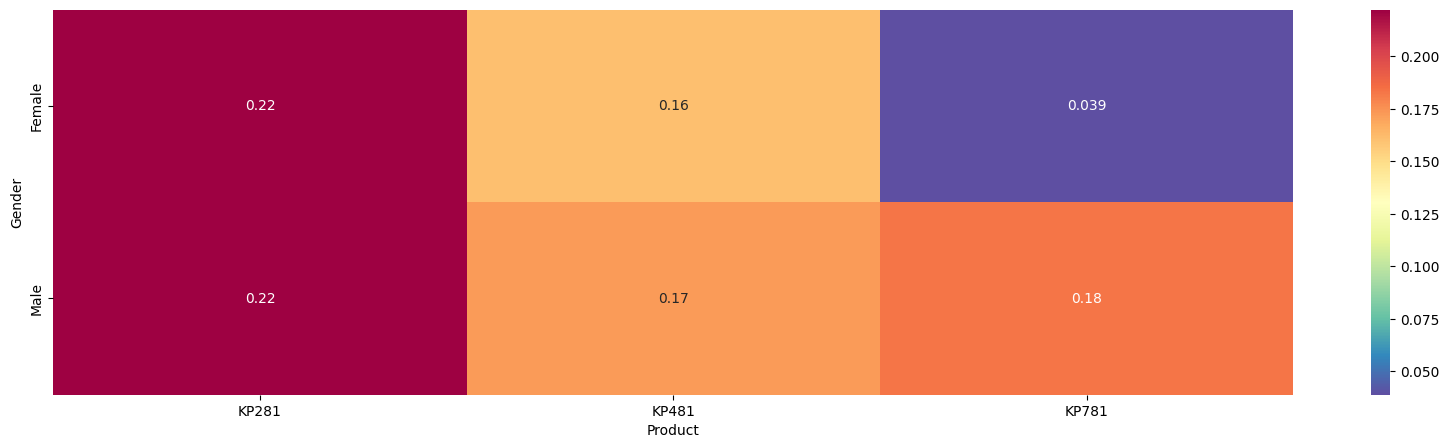

In [ ]:
sns.heatmap(pd.crosstab(aerofit['Gender'], aerofit['Product'], normalize=True), annot=True, cmap='Spectral_r')
plt.show()

<h4><font color="cyan" style="sans-serif">Joint Probability, P(Product Intersection Gender)</font></h4>

1. Probability that customer buys KP281 and gender is Male, P(KP281 Intersection Male) = 0.22.
2. Probability that customer buys KP481 and gender is Male, P(KP481 Intersection Male) = 0.17.
3. Probability that customer buys KP781 and gender is Male, P(KP781 Intersection Male) = 0.18.
4. Probability that customer buys KP281 and gender is Female, P(KP281 Intersection Female) = 0.22.
5. Probability that customer buys KP481 and gender is Female, P(KP481 Intersection Female) = 0.16.
6. Probability that customer buys KP781 and gender is Female, P(KP781 Intersection Female) = 0.039.


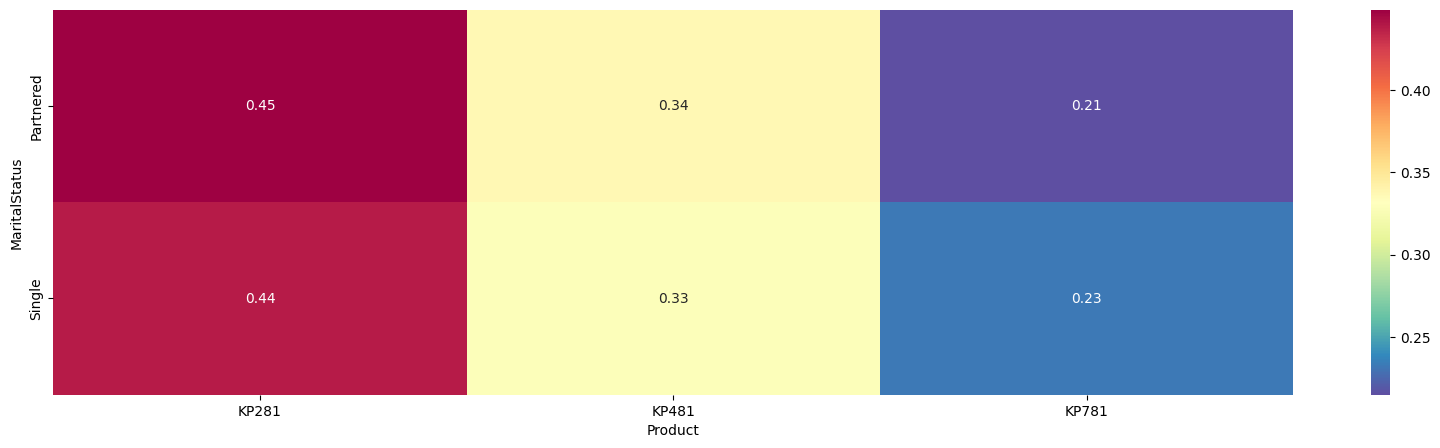

In [ ]:
sns.heatmap(pd.crosstab(aerofit['MaritalStatus'], aerofit['Product'], normalize='index'), annot=True, cmap='Spectral_r')
plt.show()

<h4><font color="cyan" style="sans-serif">Conditional Probability, P(Product | MaritalStatus)</font></h4>

1.   Probability of buying KP281 given that the marital status is single, P(Product=KP281 | MaritalStatus=Single) = 0.44.
2.   Probability of buying KP481 given that the marital status is single, P(Product=KP481 | MaritalStatus=Single) = 0.33.
3.   Probability of buying KP781 given that the marital status is single, P(Product=781 | MaritalStatus=Single) = 0.23.

1.   Probability of buying KP281 given that the marital status is partnered, P(Product=KP281 | MaritalStatus=Single) = 0.45.
2.   Probability of buying KP481 given that the cmarital status is partnered, P(Product=KP481 | MaritalStatus=Single) = 0.34.
3.   Probability of buying KP781 given that the marital status is partnered, P(Product=KP781 | MaritalStatus=Single) = 0.21.


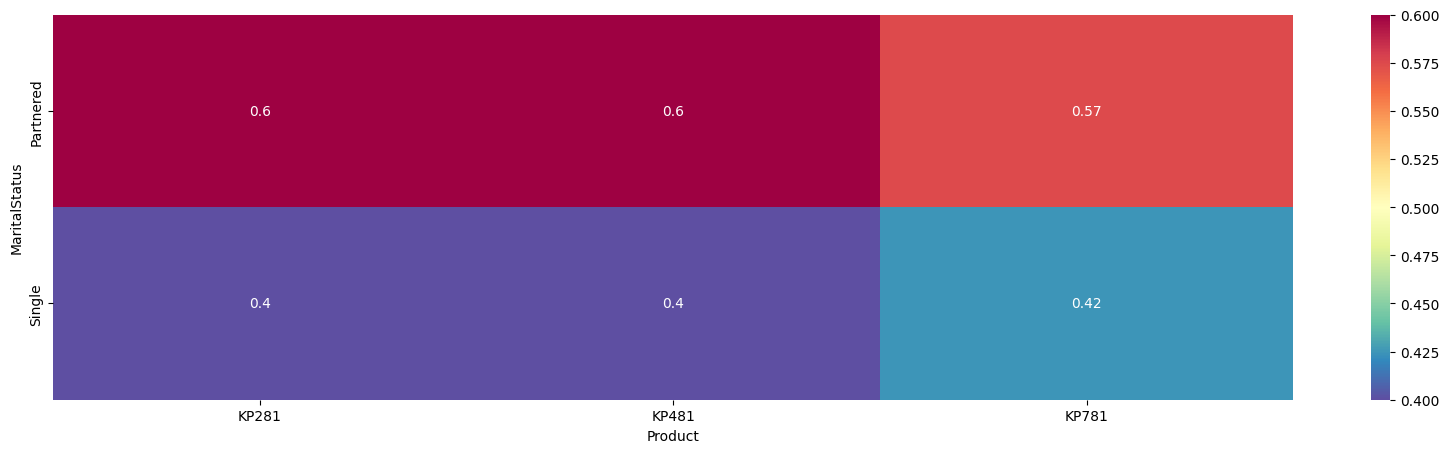

In [ ]:
sns.heatmap(pd.crosstab(aerofit['MaritalStatus'], aerofit['Product'], normalize='columns'), annot=True, cmap='Spectral_r')
plt.show()

<h4><font color="cyan" style="sans-serif">Conditional Probability P(MaritalStatus | Product)</font></h4>

1.   Probability of Marital Status being Single given that KP281 is purchased, P(MaritalStatus=Single | Product=KP281) = 0.40.
2.   Probability of Marital Status being Parterned given that KP281 is purchased, P(MaritalStatus=Parterned | Product=KP281) = 0.60.
3.   Probability of Marital Status being Single given that KP481 is purchased, P(MaritalStatus=Single | Product=KP481) = 0.4.
4.   Probability of Marital Status being Partnered given that KP481 is purchased, P(MaritalStatus=Partnered | Product=KP481) = 0.6.
5.   Probability of Marital Status being Single given that KP781 is purchased, P(MaritalStatus=Single | Product=KP781 ) = 0.42.
6.   Probability of Marital Status being Partnered given that KP781 is purchased, P(MaritalStatus=Partnered | Product=KP781 ) = 0.57.


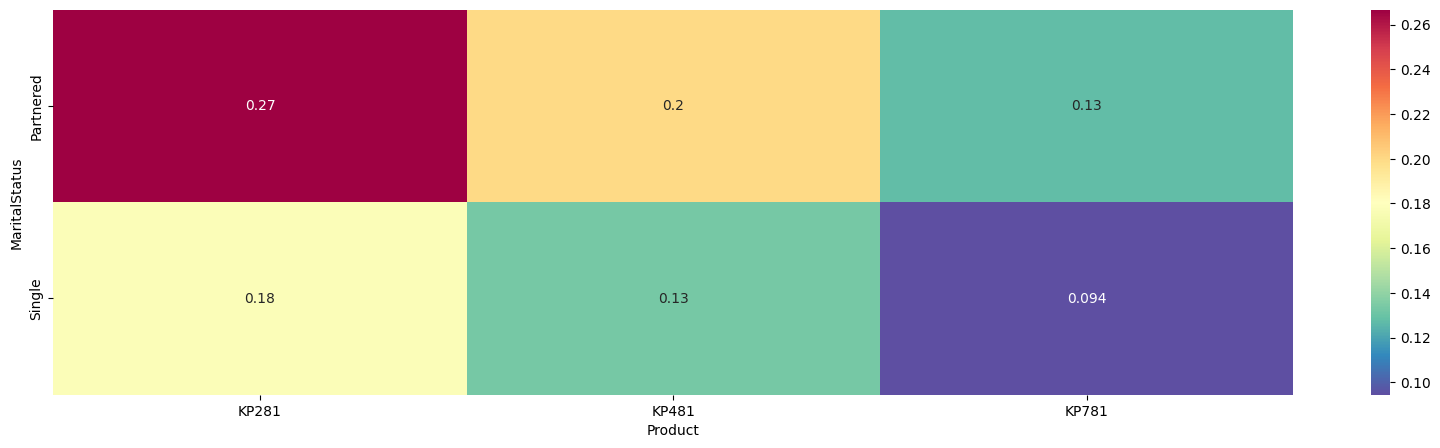

In [ ]:
sns.heatmap(pd.crosstab(aerofit['MaritalStatus'], aerofit['Product'], normalize=True), annot=True, cmap='Spectral_r')
plt.show()

<h4><font color="cyan">Joint Probability, P(Product Intersection MartialStatus)</font></h4>

1. Probability of customer buying KP281 and their MartialStatus is Single, P(KP281 Intersection Single) = 0.18.
2. Probability of customer buying KP481 and their MartialStatus is Single, P(KP481 Intersection Single) = 0.13.
3. Probability of customer buying KP781 and their MartialStatus is Single, P(KP781 Intersection Single) = 0.094.
4. Probability of customer buying KP281 and their MartialStatus is Partnered, P(KP281 Intersection Partnered) = 0.27.
5. Probability of customer buying KP481 and their MartialStatus is Partnered, P(KP481 Intersection Partnered) = 0.2.
6. Probability of customer buying K7281 and their MartialStatus is Partnered, P(KP781 Intersection Partnered) = 0.13.

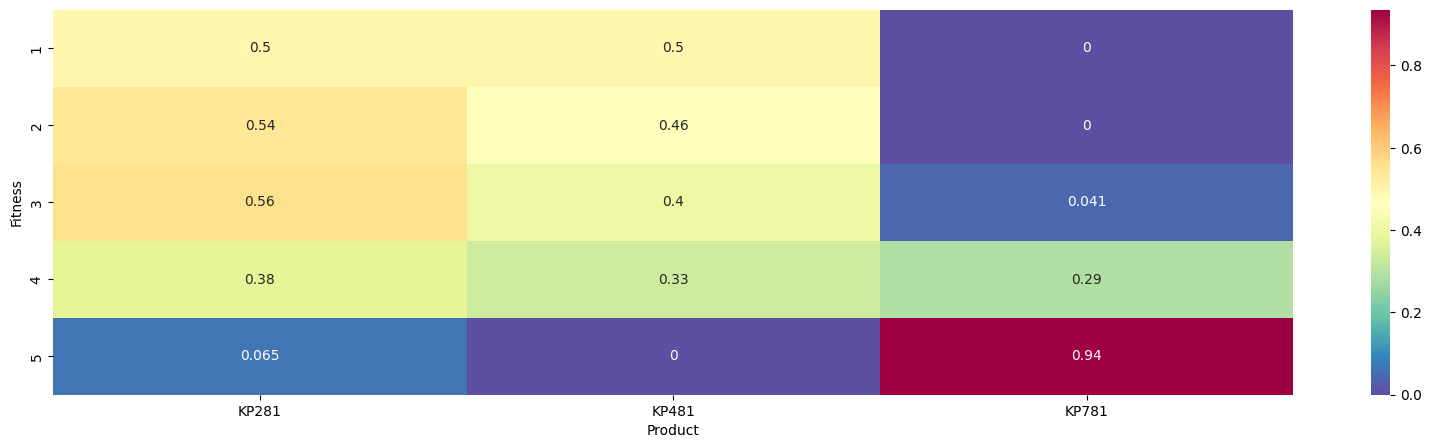

In [ ]:
sns.heatmap(pd.crosstab(aerofit['Fitness'], aerofit['Product'], normalize='index'), annot=True, cmap='Spectral_r')
plt.show()

<h4><font color="cyan" style="sans-serif">Conditional Probability P(Product | Fitness)</font></h4>

1.   Probability of customer buying KP281 given fitness rating is 5, P(Product=KP281 | Fitness=5) = 0.06.
2.   Probability of customer buying KP481 given fitness rating is 5, P(Product=KP481 | Fitness=5) = 0.0 (impossible event).
3.   Probability of customer buying KP781 given fitness rating is 5, P(Product=KP781 | Fitness=5) = 0.94.
4.   Probability of customer buying KP281 given fitness rating is 4, P(Product=KP281 | Fitness=4) = 0.38.
5.   Probability of customer buying KP481 given fitness rating is 4, P(Product=KP481 | Fitness=4) = 0.33.
6.   Probability of customer buying KP781 given fitness rating is 4, P(Product=KP781 | Fitness=4) = 0.29.
7.   Probability of customer buying KP281 given fitness rating is 3, P(Product=KP281 | Fitness=3) = 0.56.
8.   Probability of customer buying KP481 given fitness rating is 3, P(Product=KP481 | Fitness=3) = 0.4.
9.   Probability of customer buying KP781 given fitness rating is 3, P(Product=KP781 | Fitness=3) = 0.04.
10.  Probability of customer buying KP281 given fitness rating is 2, P(Product=KP281 | Fitness=2) = 0.54.
11.  Probability of customer buying KP481 given fitness rating is 2, P(Product=KP481 | Fitness=2) = 0.46.
12.  Probability of customer buying KP781 given fitness rating is 2, P(Product=KP781 | Fitness=2) = 0.0 (impossible event).
13.  Probability of customer buying KP281 given fitness rating is 1, P(Product=KP281 | Fitness=1) = 0.5.
12.  Probability of customer buying KP481 given fitness rating is 1, P(Product=KP481 | Fitness=1) = 0.5.
12.  Probability of customer buying KP781 given fitness rating is 1, P(Product=KP781 | Fitness=1) = 0.0 (impossible event).


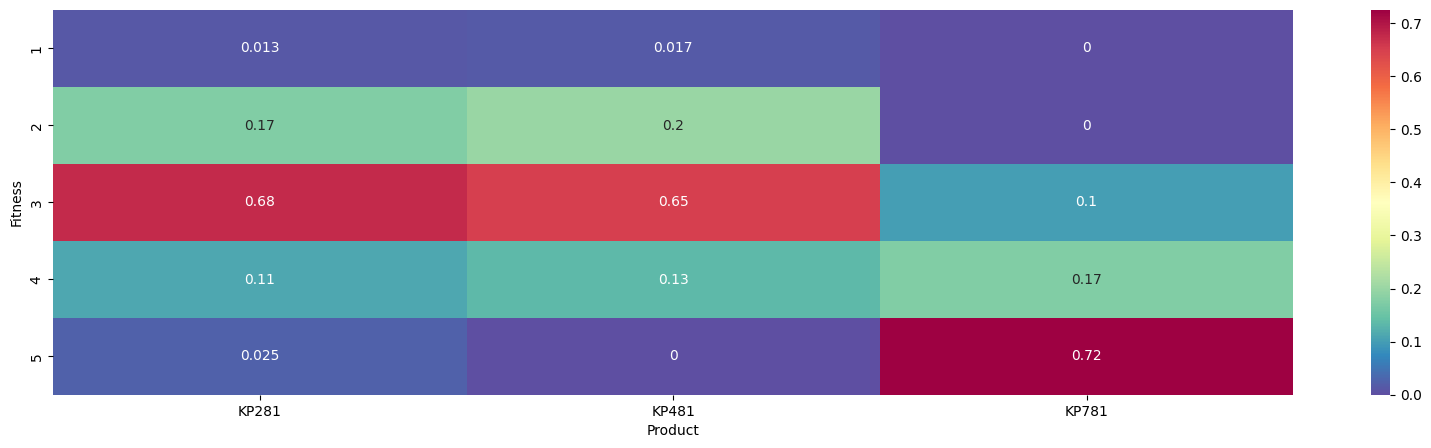

In [ ]:
sns.heatmap(pd.crosstab(aerofit['Fitness'], aerofit['Product'], normalize='columns'), annot=True, cmap='Spectral_r')
plt.show()

<h4><font color="cyan" style="sans-serif">Conditional Probability P(Fitness | Product)</font></h4>

1.   Probability of customer fitness rating is 5 given that they purchased KP281, P(Fitness=5 | Product=KP281) = 0.025.
2.   Probability of customer fitness rating is 4 given that they purchased KP281, P(Fitness=4 | Product=KP281) = 0.11.
3.   Probability of customer fitness rating is 3 given that they purchased KP281, P(Fitness=3 | Product=KP281) = 0.68.
4.   Probability of customer fitness rating is 2 given that they purchased KP281, P(Fitness=2 | Product=KP281) = 0.17.
5.   Probability of customer fitness rating is 1 given that they purchased KP281, P(Fitness=1 | Product=KP281) = 0.013.
6.   Probability of customer fitness rating is 5 given that they purchased KP481, P(Fitness=5 | Product=KP481) = 0.0 (impossible event).
7.   Probability of customer fitness rating is 4 given that they purchased KP481, P(Fitness=4 | Product=KP481) = 0.13.
8.   Probability of customer fitness rating is 3 given that they purchased KP481, P(Fitness=3 | Product=KP481) = 0.65.
9.   Probability of customer fitness rating is 2 given that they purchased KP481, P(Fitness=2 | Product=KP481) = 0.2.
10.  Probability of customer fitness rating is 1 given that they purchased KP481, P(Fitness=1 | Product=KP481) = 0.017.
11.  Probability of customer fitness rating is 5 given that they purchased KP781, P(Fitness=5 | Product=KP781) = 0.72.
12.  Probability of customer fitness rating is 4 given that they purchased KP781, P(Fitness=4 | Product=KP781) = 0.17.
13.  Probability of customer fitness rating is 3 given that they purchased KP781, P(Fitness=3 | Product=KP781) = 0.1.
12.  Probability of customer fitness rating is 2 given that they purchased KP781, P(Fitness=2 | Product=KP781) = 0.0 (impossible event).
12.  Probability of customer fitness rating is 1 given that they purchased KP781, P(Fitness=1 | Product=KP781) = 0.0 (impossible event).


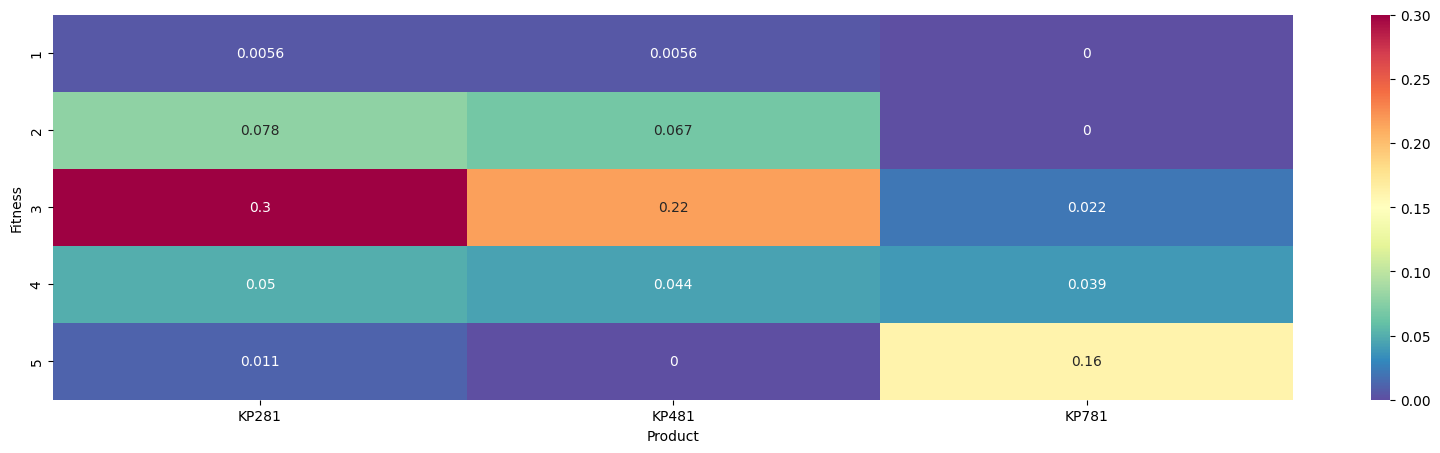

In [ ]:
sns.heatmap(pd.crosstab(aerofit['Fitness'], aerofit['Product'], normalize=True), annot=True, cmap='Spectral_r')
plt.show()

<h4><font color="cyan" style="sans-serif">Joint Probability P(Product Intersection Fitness)</font></h4>

1. Probability of buying KP281 and their fitness rating is 5, P(KP281 Intersection Fitness=5) = 0.0011.
2. Probability of buying KP281 and their fitness rating is 4, P(KP281 Intersection Fitness=4) = 0.05.
3. Probability of buying KP281 and their fitness rating is 3, P(KP281 Intersection Fitness=3) = 0.3.
4. Probability of buying KP281 and their fitness rating is 2, P(KP281 Intersection Fitness=2) = 0.078.
5. Probability of buying KP281 and their fitness rating is 1, P(KP281 Intersection Fitness=1) = 0.0056.
6. Probability of buying KP481 and their fitness rating is 5, P(KP481 Intersection Fitness=5) = 0.0 (impossible event).
7. Probability of buying KP481 and their fitness rating is 4, P(KP481 Intersection Fitness=4) = 0.0044.
8. Probability of buying KP481 and their fitness rating is 3, P(KP481 Intersection Fitness=3) = 0.22.
9. Probability of buying KP481 and their fitness rating is 2, P(KP481 Intersection Fitness=2) = 0.067.
10. Probability of buying KP481 and their fitness rating is 1, P(KP481 Intersection Fitness=1) = 0.0056.
11. Probability of buying KP781 and their fitness rating is 5, P(KP781 Intersection Fitness=5) = 0.16.
12. Probability of buying KP781 and their fitness rating is 4, P(KP781 Intersection Fitness=4) = 0.039.
13. Probability of buying KP781 and their fitness rating is 3, P(KP781 Intersection Fitness=3) = 0.022.
14. Probability of buying KP781 and their fitness rating is 2, P(KP781 Intersection Fitness=2) = 0.0 (impossible event).
15. Probability of buying KP781 and their fitness rating is 1, P(KP781 Intersection Fitness=1) = 0.0 (impossible event).



In [ ]:
aerofit['Product'].value_counts(normalize=True)

KP281    0.444444
KP481    0.333333
KP781    0.222222
Name: Product, dtype: float64

<h4><font color="cyan" style="sans-serif">Marginal Probability P(Product)</font></h4>

1. Probability of buying KP281 treadmill, P(Product=KP281) = 0.44.
1. Probability of buying KP481 treadmill, P(Product=KP481) = 0.33.
1. Probability of buying KP781 treadmill, P(Product=KP781) = 0.22.

In [ ]:
aerofit['Gender'].value_counts(normalize=True)

Male      0.577778
Female    0.422222
Name: Gender, dtype: float64

<h4><font color="cyan" style="sans-serif">Marginal Probability P(Gender)</font></h4>

1. Probability of customer gender is Male, P(Gender=Male) = 0.58.
2. Probability of customer gender is Female, P(Gender=Female) = 0.42.

In [ ]:
aerofit['MaritalStatus'].value_counts(normalize=True)

Partnered    0.594444
Single       0.405556
Name: MaritalStatus, dtype: float64

<h4><font color="cyan" style="sans-serif">Marginal Probability P(MaritalStatus)</font></h4>

1. Probability of customer's MaritalStatus is Partnered, P(MaritalStatus=Partnered) = 0.60.
2. Probability of customer's MaritalStatus is Single, P(MaritalStatus=Single) = 0.40.


In [ ]:
aerofit['Fitness'].value_counts(normalize=True)

3    0.538889
5    0.172222
2    0.144444
4    0.133333
1    0.011111
Name: Fitness, dtype: float64

<h4><font color="cyan" style="sans-serif">Marginal Probability P(Fitness)</font></h4>

1. Probability of customer having fitness rating of 3 is P(Fitness=3) = 0.53.
2. Probability of customer having fitness rating of 5 is P(Fitness=5) = 0.17.
3. Probability of customer having fitness rating of 2 is P(Fitness=2) = 0.14.
4. Probability of customer having fitness rating of 4 is P(Fitness=4) = 0.13.
5. Probability of customer having fitness rating of 1 is P(Fitness=1) = 0.01.

In [ ]:
aerofit['Usage'].value_counts(normalize=True)

3    0.383333
4    0.288889
2    0.183333
5    0.094444
6    0.038889
7    0.011111
Name: Usage, dtype: float64

<h4><font color="cyan" style="sans-serif">Marginal Probability P(Usage)</font></h4>

1. Probability of customer having usage 3 times per week is P(Usage=3) = 0.38.
2. Probability of customer having usage 4 times per week is P(Usage=4) = 0.29.
3. Probability of customer having usage 2 times per week is P(Usage=2) = 0.18.
4. Probability of customer having usage 5 times per week is P(Usage=5) = 0.09.
5. Probability of customer having usage 6 times per week is P(Usage=6) = 0.03.
6. Probability of customer having usage 7 times per week is P(Usage=7) = 0.01.

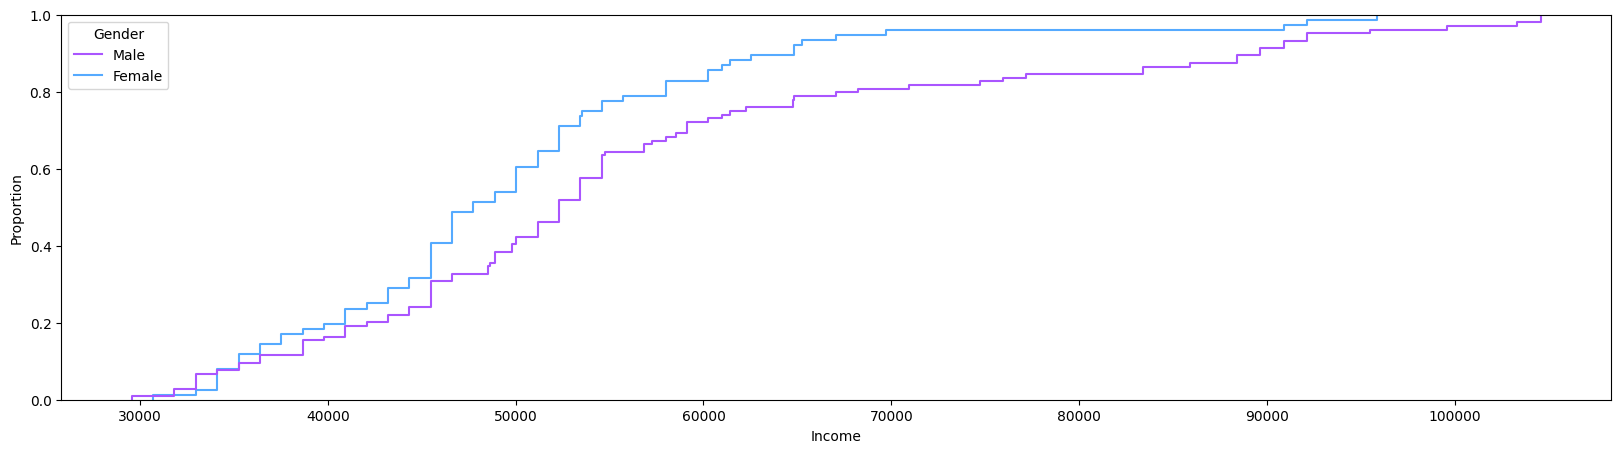

In [ ]:
sns.ecdfplot(data=aerofit, x='Income', complementary=False, palette='cool_r', hue='Gender')
plt.show()

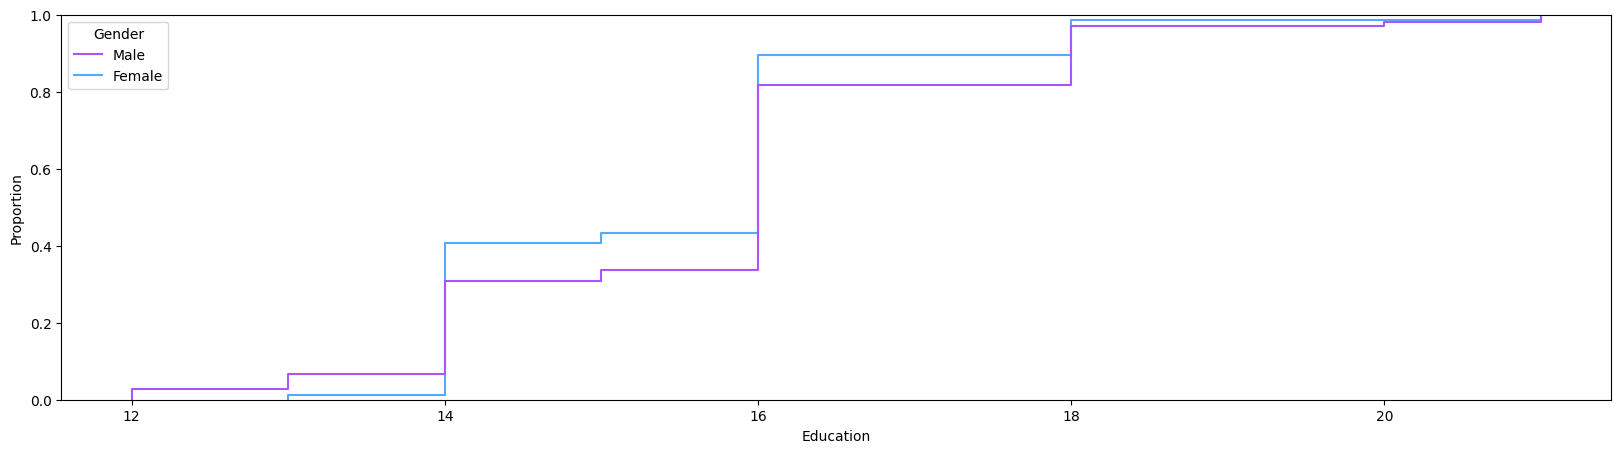

In [ ]:
sns.ecdfplot(data=aerofit, x='Education', complementary=False, palette='cool_r', hue='Gender')
plt.show()

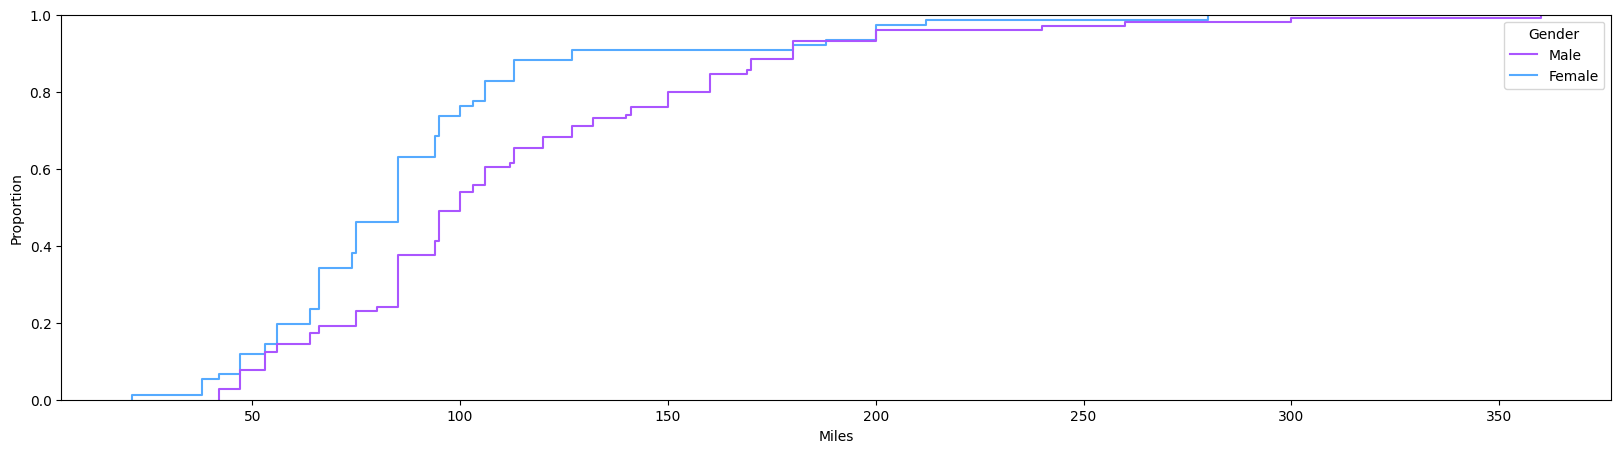

In [ ]:
sns.ecdfplot(data=aerofit, x='Miles', complementary=False, palette='cool_r', hue='Gender')
plt.show()

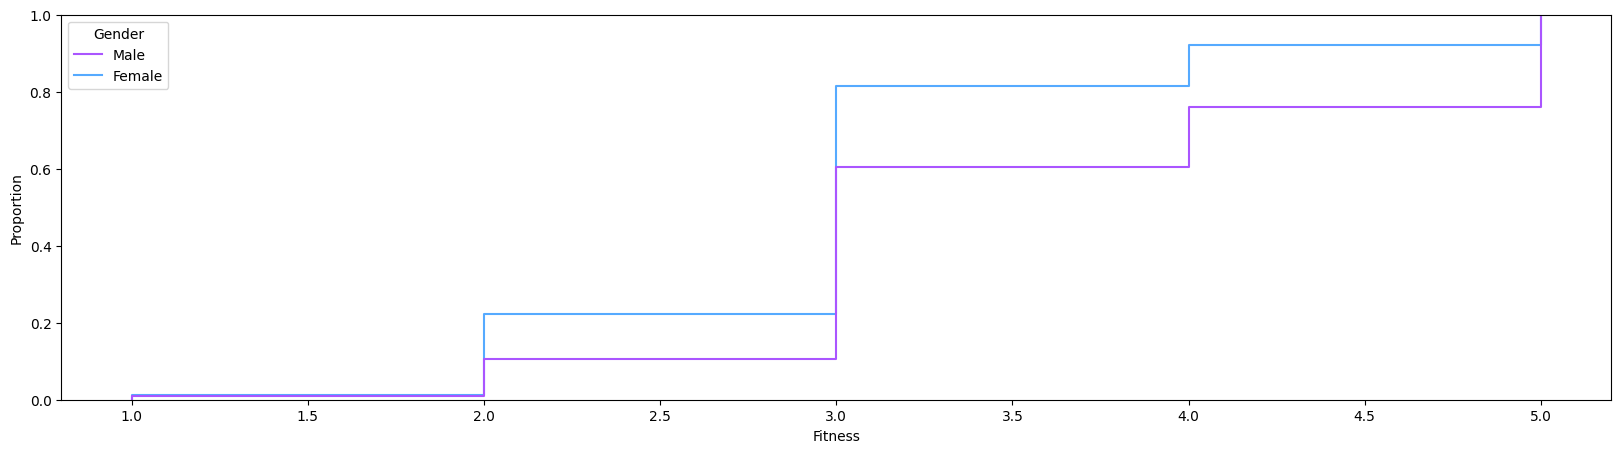

In [ ]:
sns.ecdfplot(data=aerofit, x='Fitness', complementary=False, palette='cool_r', hue='Gender')
plt.show()

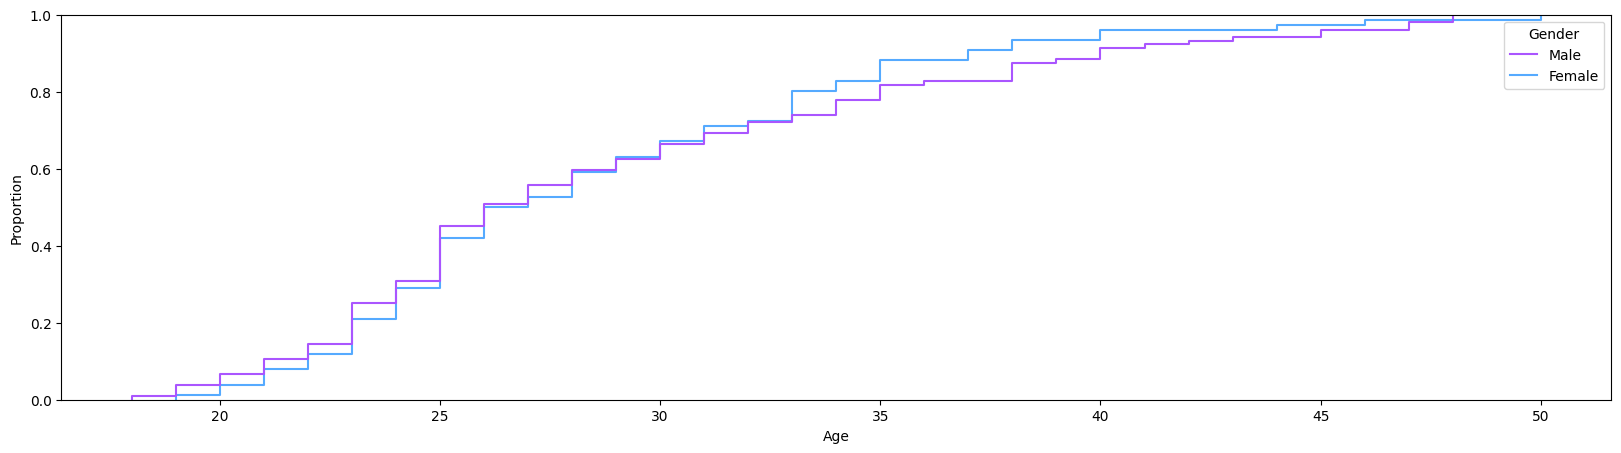

In [ ]:
sns.ecdfplot(data=aerofit, x='Age', complementary=False, palette='cool_r', hue='Gender')
plt.show()

<h1><font color="red">Conclusions</font></h1>

Business Insights(based on Non-Graphical and Visual Analysis):

1. The top three purchased treadmill models are KP281, KP481, and KP781, in that order.
2. There is a higher proportion of male buyers compared to female buyers.
3. More customers are in a partnered marital status compared to single.
4. The average age of customers is 28, with a range between 18 to 50 years and a median of 26 years.
5. The average education level of customers is 15.5 years, with a range between 2 to 21 years and a median of 16 years.
6. On average, customers plan to use the treadmill three times per week, with a range between 2 to 7 times per week and a median of three times per week.
7. The average self-fitness rating of customers is 3, with a range between 1 to 5 and a median of 3.
8. Customers' average annual income is 53.7K dollars, with a range between 29.5K dollars to 104K dollars and a median income of 50.5K dollars.
9. The average distance traveled by customers on the treadmill is 103 miles, with a range between 21 to 360 miles and a median of 94 miles.
10. There is a moderately strong relationship between education and income.
11. The relationship between fitness and distance traveled on the treadmill is strong.
12. Similarly, there is a strong relationship between usage frequency and distance traveled on the treadmill.
13. The age difference between the 25th and 75th percentile is nine years, indicating a relatively narrow age spread among customers.
14. The education years difference between the 25th and 75th percentile is two years, suggesting a moderate spread in education levels among customers.
15. Most customers use the treadmill 3-4 times per week, with very few using it 6-7 times per week.
16. The majority of customers rate themselves as moderately fit.
17. The mean income for KP281 buyers is 46.4K dollars, for KP481 buyers is 48.9K dollars, and for KP781 buyers is 75.4K dollars.
18. KP281 and KP481 have the same mean usage of 3, while KP781 has a mean usage of 4.
19. The mean fitness rating for KP281 and KP481 buyers is 3, while for KP781 buyers, it is 4.6.
20. KP781 is the most preferred treadmill among male customers, while females show the least preference for it.
21. Overall, male customers tend to use treadmills more frequently than females.
22. The income distribution between both genders is roughly similar.
23. Males tend to have a higher fitness level compared to females.
24. The distance traveled on the treadmill is roughly the same for both genders, but men tend to cover longer distances, with some going beyond 320 miles.
25. Partnered customers tend to have a higher fitness level compared to singles.


<h1><font color="red">Customer Profiling- Categorization of Users</font></h1>

<h2><font color="red"><b>KP281</b></font></h2>

1. KP281 stands as the top-selling treadmill model, contributing to 44.44% of total sales.
2. The average income of KP281 buyers is 46.4K dollars.
3. Customers using KP281 have an average planned usage of three times per week.
4. KP281 customers demonstrate an average fitness rating of 3 (rounded).
5. Both genders equally favor the KP281 model as their preferred treadmill choice.
6. The age range of KP281 buyers falls approximately between 22 to 33 years.
7. The income range of KP281 treadmill customers typically lies between 39K dollars to 53K dollars.
8. The education level of KP281 buyers ranges from 14 to 16 years.
9. On the KP281 treadmill, customers cover an approximate distance of 75 to 80 miles.
10. The median/mean fitness rating for KP281 users remains at 3.
11. Single female customers slightly outnumber single male customers in KP281 purchases, while partnered male customers bought KP281 slightly more than single male customers.




<h2><font color="red"><b>KP481</b></font></h2>

1. KP481 is the second highest-selling treadmill model, accounting for 33.33% of sales.
2. Customers purchasing KP481 have an average income of 49K dollars.
3. The average planned usage of KP481 customers is three times per week.
4. KP481 customers have an average fitness rating of 3.
5. The KP481 model is slightly more popular among male buyers.
6. Couples are more likely to buy the KP481 model than single customers.
7. The age range of KP481 treadmill customers is typically between 24-34 years.
8. The income range of KP481 customers is approximately 45K dollars - 53K dollars.
9. The educational background of KP481 buyers is similar to that of KP281, spanning 14 - 16 years of education.
10. KP481 customers typically cover a distance of about 75 - 100 miles on the treadmill, making it the second most frequently used model in terms of distance.
11. The median/mean fitness rating for KP481 customers is 3, similar to KP281.
12. The purchase probabilities show no significant gender-based or marital status-based differences for KP481 buyers.



<h2><font color="red"><b>KP781</b></font></h2>

1. KP781 is a less commonly purchased treadmill model due to its higher price.
2. The average income of KP781 buyers is 75.4K dollars.
3. KP781 customers use the treadmill an average of four times per week.
4. The average fitness rating of KP781 buyers is 4.
5. KP781 is predominantly preferred by males, while fewer females buy this model.
6. The KP781 treadmill is not popular among both single and partnered customers.
7. The age range of KP781 buyers is approximately between 25-30 years, and it has seen relatively fewer purchases, possibly due to its higher cost.
8. The income range for KP781 buyers is roughly between 59K dollars to 92K dollars, showing a wider range compared to KP281 & KP481 models.
9. KP781 buyers typically have an education level ranging from 16 to 18 years, and there is a high correlation between education and income, potentially influencing the purchase decision.
10. KP781's fitness range is between 4 - 5, making it more attractive to people who are already fit and seeking additional features.
11. Partnered females are more likely to buy KP781 treadmills compared to partnered males, whereas single male customers show a higher preference for KP781 compared to single females.







<h1><font color="red">Recommendations</font></h1>

1. Promote KP281 and KP481 treadmills as budget-friendly options, especially targeting customers with annual incomes in the range of 39K - 53K Dollars.
2. Market KP781 treadmill as a premium product with advanced features, targeting professionals and athletes.
3. Enhance the marketing strategy for KP781 by associating it with renowned athletes like Neeraj Chopra, leveraging their achievements for better outreach.
4. Run special marketing campaigns on Women's Day and Mother's Day to encourage more women to adopt an exercise routine, highlighting the benefits of using our treadmills.
5. Conduct research to expand the customer base beyond 50 years of age. Offer basic treadmill models (KP281/KP481) as suitable options for beginners in this age group.
6. Encourage existing customers to upgrade their treadmills to high-end models as their usage increases over time, leading to increased revenue for the business.

**************
### Details:

#### Name: Santhosh B
#### Email: santhoshjune12@gmail.com
#### Batch: DSML May23 Beginner Tue
**************